In [1]:
## Import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Warnings to ignore Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score,silhouette_samples

In [2]:
## Reading Excel file
#from google.colab import files
#uploaded = files.upload()

In [3]:
data = pd.read_excel(r"F:\Data Science\Project\DataSet\marketing_campaign1 (1).xlsx")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
data.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
data.shape

(2240, 29)

In [8]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
data.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

**Checking For "NULL" & "DUPLICATE" Values**

In [10]:
data.duplicated().sum()

0

In the above data there is no duplicated values

In [11]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In our dataset, there are 24 missing values in the 'Income' column because some people didn't share their income information in the survey. To handle this, we can try guessing those missing incomes based on the incomes we know, use other information like education or marital status to help us guess, and remember which values were missing to make sure our analysis is accurate.

In [12]:
## From above we can see INCOME Variable consists of 24 NULL VALUES,so we have to fill them with the mean of that Variable
data['Income'] = data['Income'].fillna(data['Income'].mean())
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

We noticed that the 'Income' variable had 24 missing values (null values) in our dataset. To handle this, we filled those missing values with the average (mean) income from the available data. After this operation, there are no more missing values in the 'Income' column.

In [13]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Feature Engineering**

In [14]:
#Count values of categorical columns
print('Values of Education levels: ', data['Education'].value_counts())
print('Values of Marital Status: ', data['Marital_Status'].value_counts())

Values of Education levels:  Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Values of Marital Status:  Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [15]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [16]:
## Group marital status into only two status
data['Marital_Status'] = data['Marital_Status'].apply(lambda x: "Partner" if x in {"Married", "Together"} else "Alone")

In [17]:
data['Marital_Status'].unique()

array(['Alone', 'Partner'], dtype=object)

In [18]:
## Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
data['Age'] = 2015 - data['Year_Birth']

In [19]:
## Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [20]:
## Create another feature "Total No. Accepted Camp" indicating the total
data['Total_acc_cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [21]:
## Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
data['Children'] = data['Kidhome'] + data['Teenhome']

In [22]:
#To get further clarity of household, Creating feature indicating "Family_Size"
data['Family_Size'] = data['Marital_Status'].replace({'Alone': 1, 'Partner':2}) + data['Children']

In [23]:
#Create a feature "Is_Parent" to indicate parenthood status
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

## EDA After Feature Engineering

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<AxesSubplot:xlabel='Education', ylabel='count'>

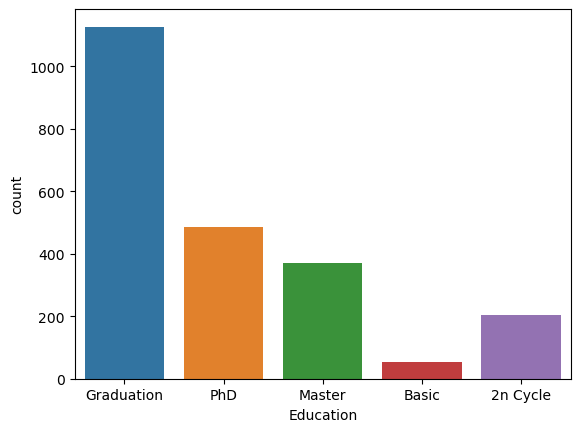

In [25]:
sns.countplot(x='Education',data=data)

Text(0.5, 1.0, 'Age')

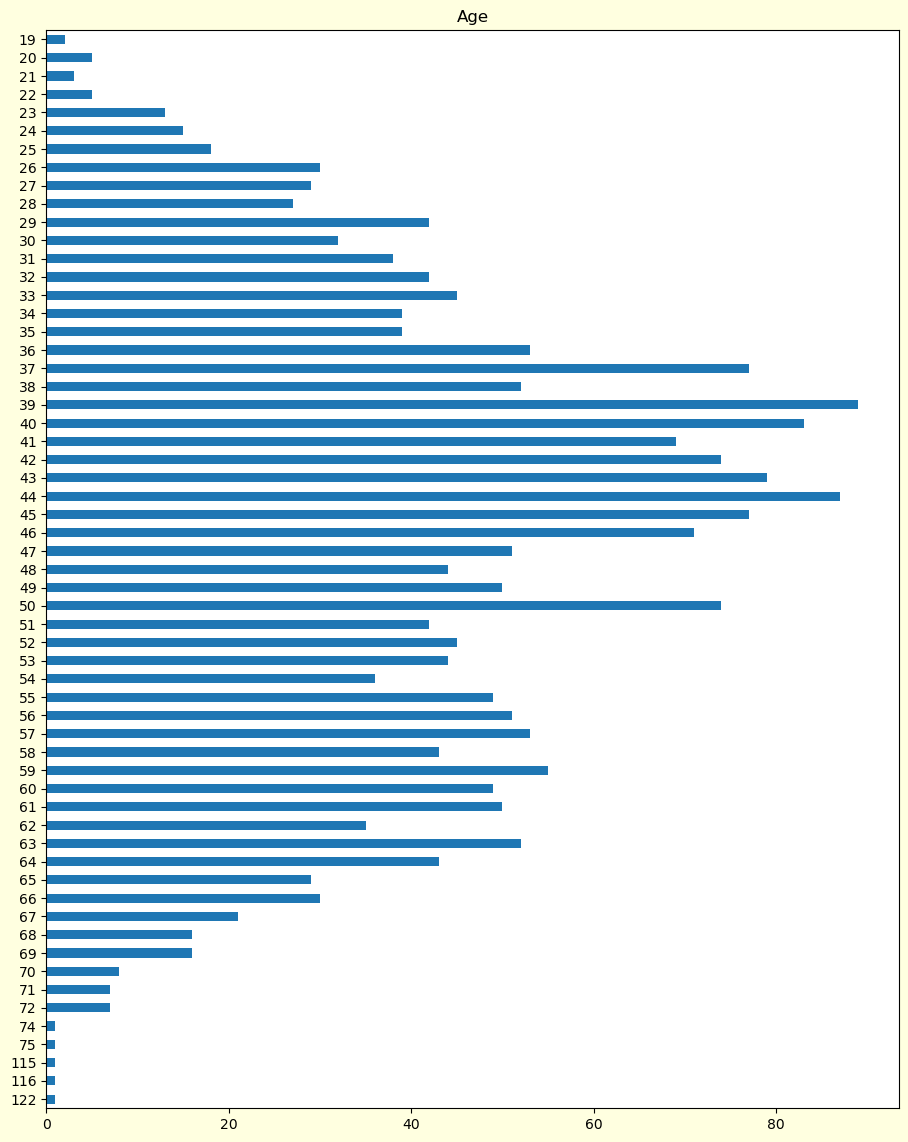

In [26]:
plt.figure(figsize=(11,14),facecolor='lightyellow')
data['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

<AxesSubplot:xlabel='Kidhome', ylabel='count'>

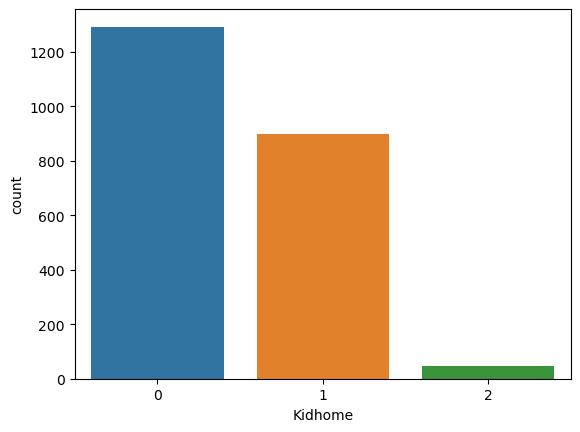

In [27]:
sns.countplot(x='Kidhome',data=data)

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

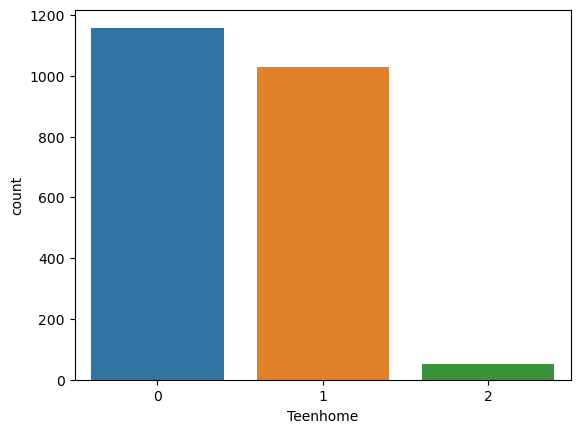

In [28]:
sns.countplot(x='Teenhome',data=data)

<AxesSubplot:>

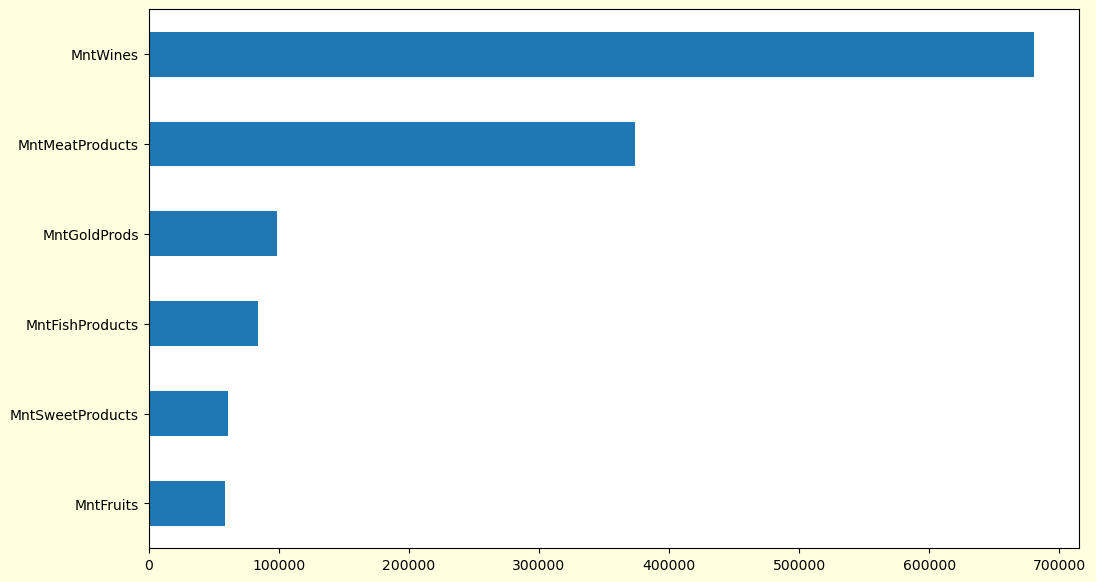

In [29]:
plt.figure(figsize=(12,7),facecolor='lightyellow')
data[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum().sort_values(ascending= True ).plot(kind='barh')

<AxesSubplot:>

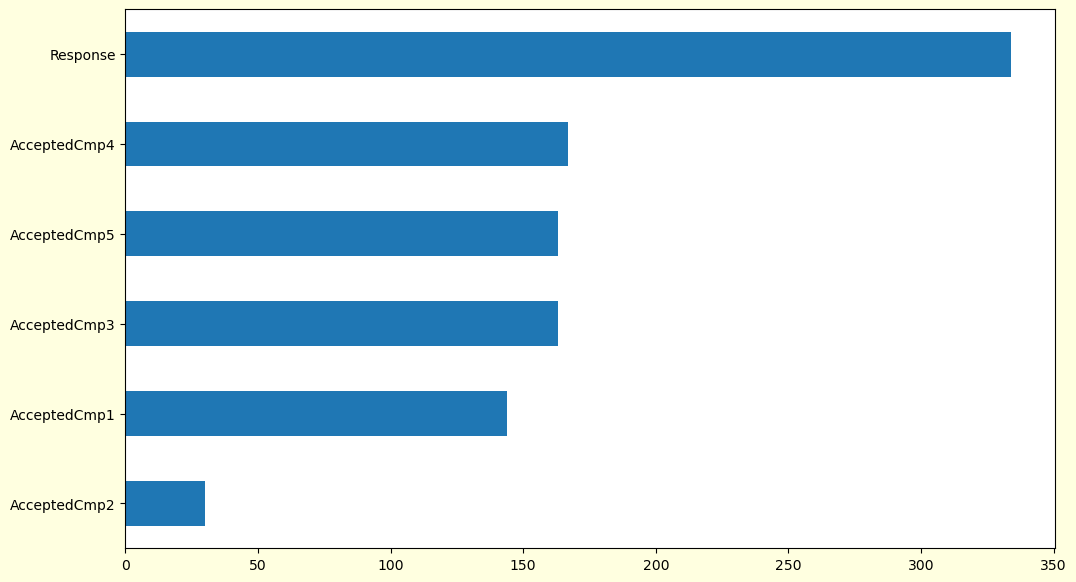

In [30]:
plt.figure(figsize=(12,7),facecolor='lightyellow')
data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum().sort_values(ascending= True ).plot(kind='barh')

<AxesSubplot:>

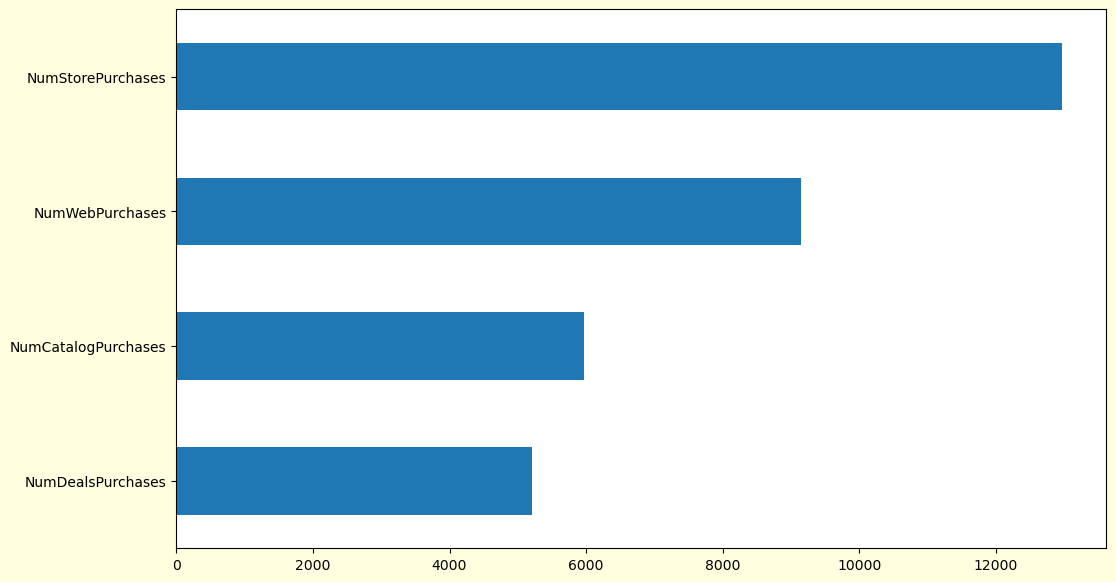

In [31]:
plt.figure(figsize=(12,7),facecolor='lightyellow')
data[[ 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending= True ).plot(kind='barh')

<AxesSubplot:xlabel='Education'>

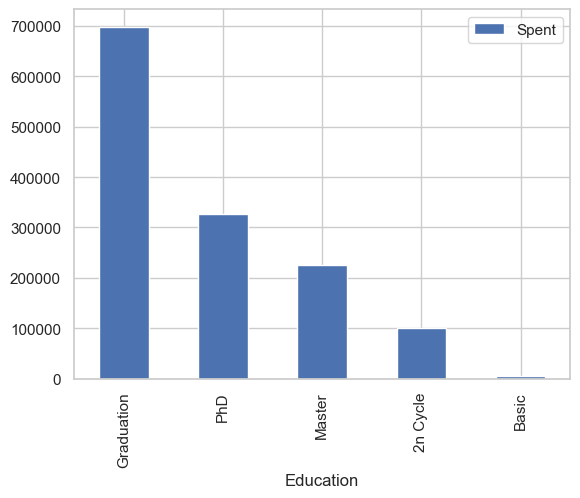

In [32]:
sns.set(style='whitegrid')
data[['Education','Spent']].groupby('Education').sum().sort_values(by='Spent',ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Marital_Status'>

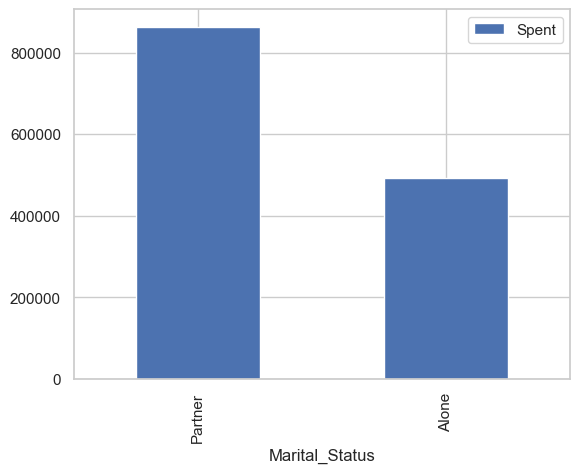

In [33]:
sns.set(style='whitegrid')
data[['Marital_Status','Spent']].groupby('Marital_Status').sum().sort_values(by='Spent',ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Kidhome'>

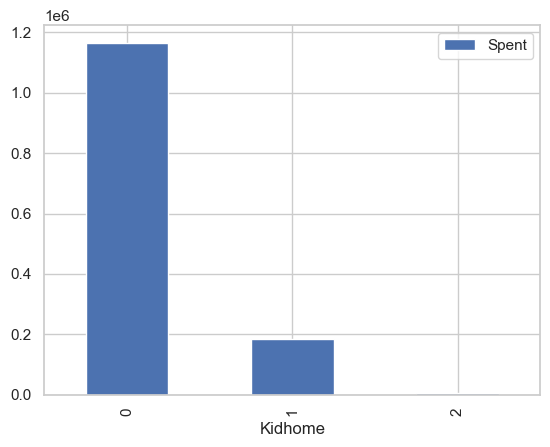

In [34]:
sns.set(style='whitegrid')
data[['Kidhome','Spent']].groupby('Kidhome').sum().sort_values(by='Spent',ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Teenhome'>

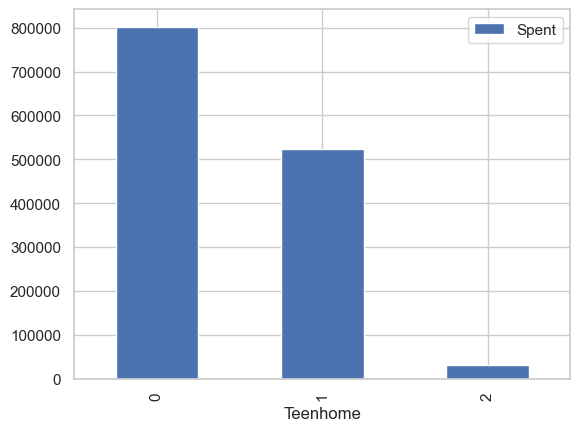

In [35]:
sns.set(style='whitegrid')
data[['Teenhome','Spent']].groupby('Teenhome').sum().sort_values(by='Spent',ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Education'>

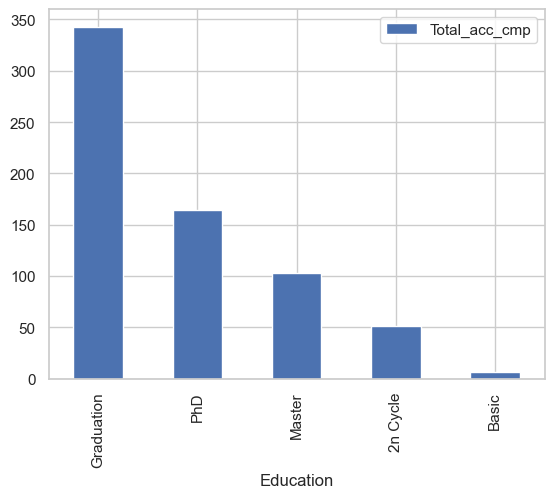

In [36]:
sns.set(style='whitegrid')
data[['Education','Total_acc_cmp']].groupby('Education').sum().sort_values(by='Total_acc_cmp',ascending=False).plot(kind='bar')

<AxesSubplot:>

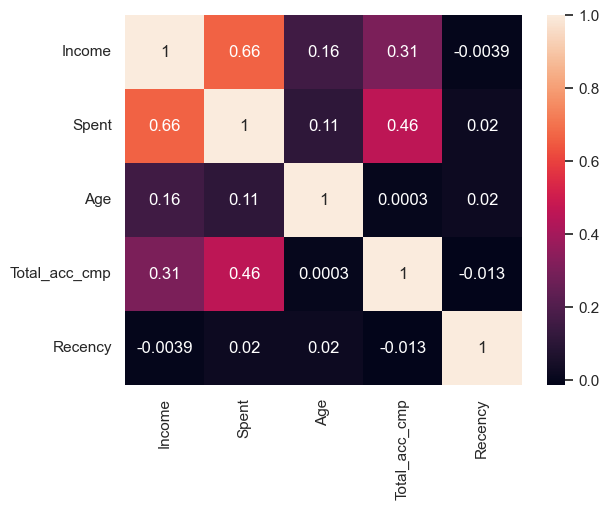

In [37]:
sns.heatmap(data[['Income','Spent','Age','Total_acc_cmp','Recency']].corr(),annot=True)

As there are strong correlation between "Income" & "Spent". So, applying Bivariate Analysis between them.

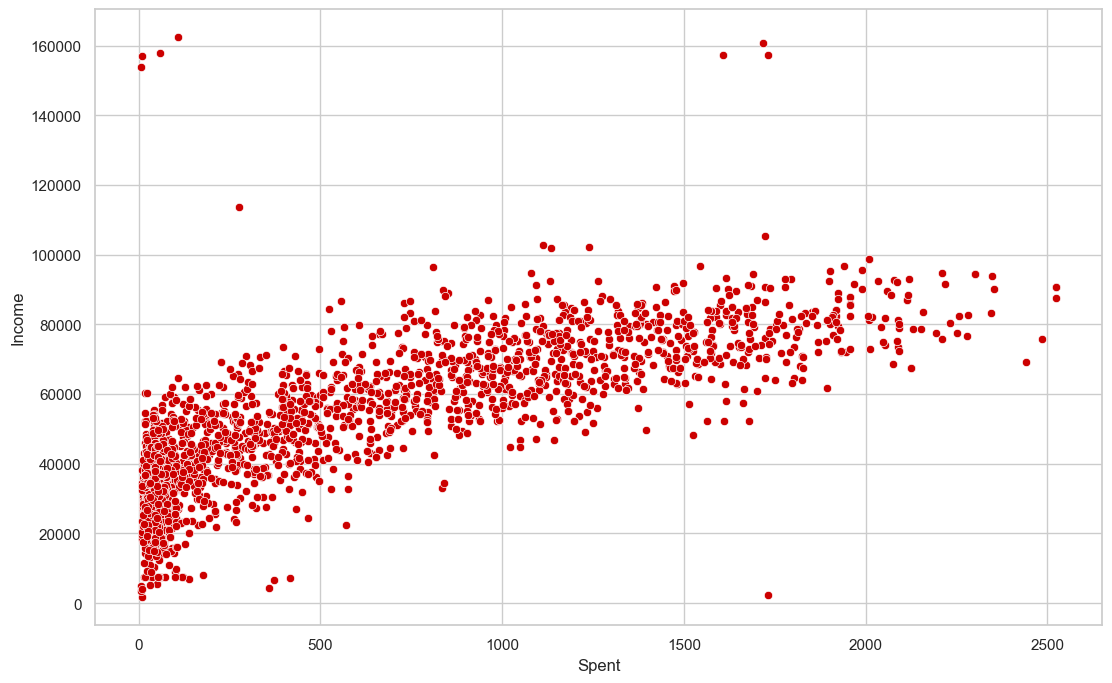

In [38]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');

**Outlier Detection**

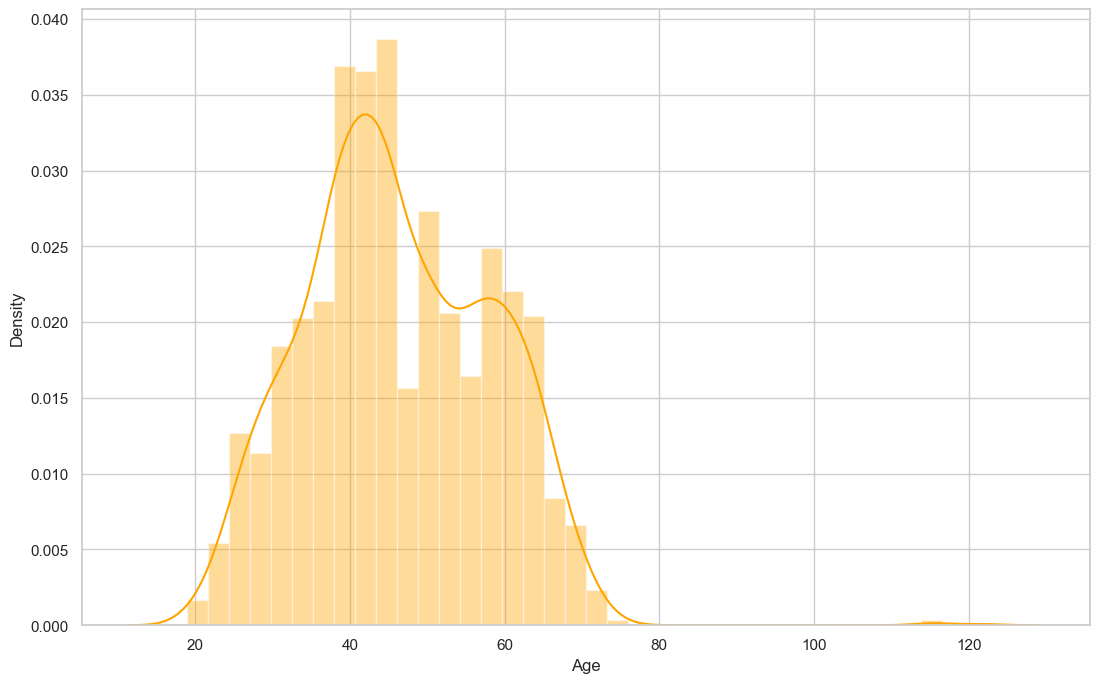

In [39]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='orange');

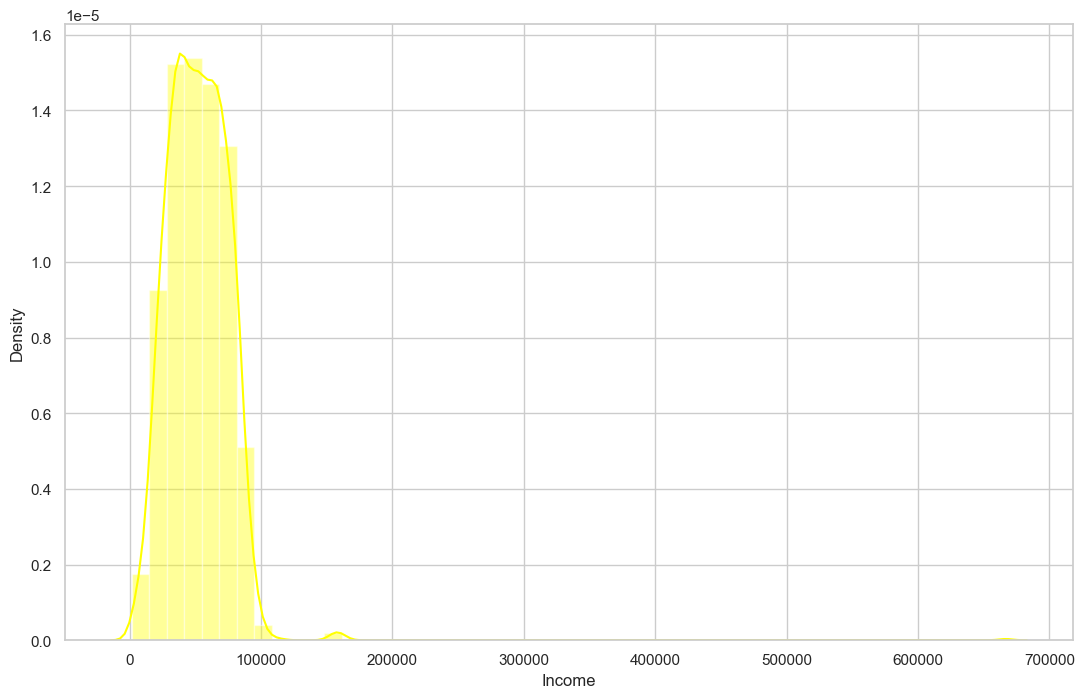

In [40]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='Yellow');

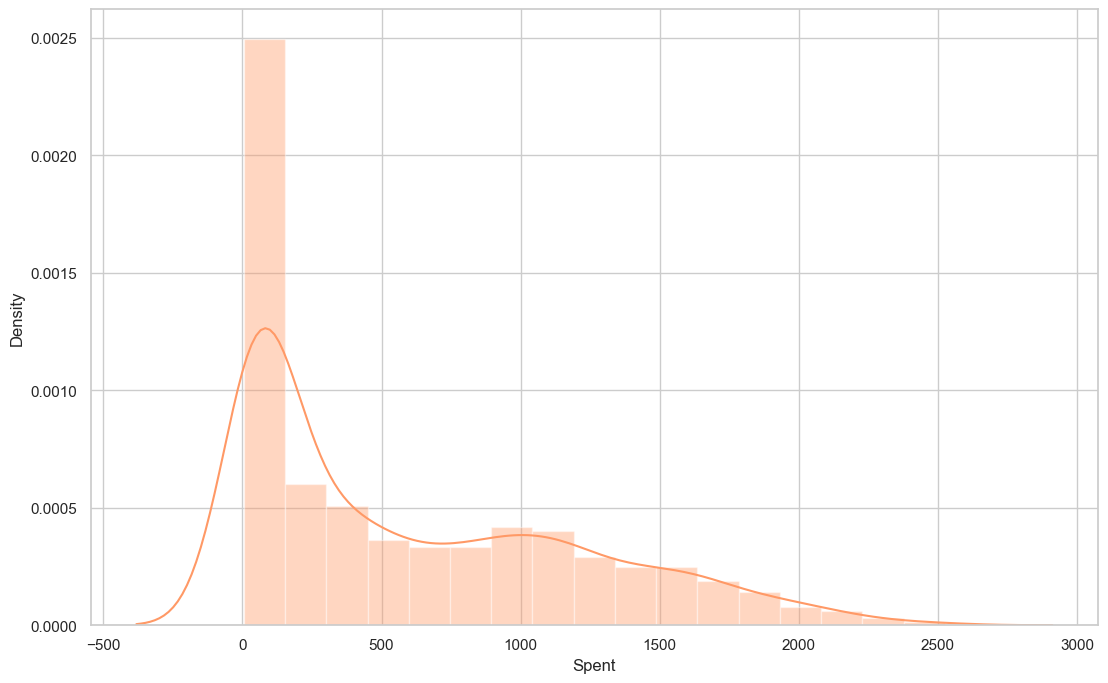

In [41]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='#ff9966');

In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [43]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color = '#6699ff',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color = '#ff0066',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=data['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()


In [44]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

In [45]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [46]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



In [47]:
#We will delete some of the outlier points.
data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [48]:
data.shape

(2236, 35)

In [49]:
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  \
0            0  2012-09-04       58       635  ...         0              3   
1            1  2014-03-08       38        11  ...         0              3   
2            0  2013-08-21       26       426  ...         0              3   
3            0  2014-02-10       26        11  ...         0              3   
4            0  2014-01-19       94       173  ...         0              3   
...        ...         ...      ...       ...  ...       ...            ...   
2235         1  2013-06-13       46       709  ...         0              3   
2236         1  2014-06-10       56       406  ...         0              3   
2237         0  2014-01-25       91       908  ...         0              3   
2238         1  2014-01-24        8       428  ...         0              3   
2239         1  2012-10-15       40        84  ...         0              3   

      Z_Revenue  Response  Age  Spent  Total_acc_cmp  Children  Family_Size  \
0            11         1   58   1617              0         0            1   
1            11         0   61     27              0         2            3   
2            11         0   50    776              0         0            2   
3            11         0   31     53              0         1            3   
4            11         0   34    422              0         1            3   
...         ...       ...  ...    ...            ...       ...          ...   
2235         11         0   48   1341              0         1            3   
2236         11         0   69    444              1         3            5   
2237         11         0   34   1241              1         0            1   
2238         11         0   59    843              0         1            3   
2239         11         1   61    172              0         2            4   

      Is_Parent  
0             0  
1             1  
2             0  
3             1  
4             1  
...         ...  
2235          1  
2236          1  
2237          0  
2238          1  
2239          1  

[2236 rows x 35 columns]

In [50]:
data=data.drop(['Z_CostContact','Z_Revenue'],axis=1)  #droping unwanted variables from the dataset

In [51]:
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             1   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp2  Complain  Response  Age  Spent  Total_acc_cmp  Children  \
0                0         0         1   58   1617              0         0   
1                0         0         0   61     27              0         2   
2                0         0         0   50    776              0         0   
3                0         0         0   31     53              0         1   
4                0         0         0   34    422              0         1   
...            ...       ...       ...  ...    ...            ...       ...   
2235             0         0         0   48   1341              0         1   
2236             0         0         0   69    444              1         3   
2237             0         0         0   34   1241              1         0   
2238             0         0         0   59    843              0         1   
2239             0         0         1   61    172              0         2   

      Family_Size  Is_Parent  
0               1          0  
1               3          1  
2               2          0  
3               3          1  
4               3          1  
...           ...        ...  
2235            3          1  
2236            5          1  
2237            1          0  
2238            3          1  
2239            4          1  

[2236 rows x 33 columns]

# Pre-Processing

  For the analysis of model building we will take required variables from the data set   
                    -- For the Standardization/Normalization we doesn't require categorical variables    
                    -- For Easy understanding we can change the categorical variables into numerical variables using labelencoders

In [52]:
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             1   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp2  Complain  Response  Age  Spent  Total_acc_cmp  Children  \
0                0         0         1   58   1617              0         0   
1                0         0         0   61     27              0         2   
2                0         0         0   50    776              0         0   
3                0         0         0   31     53              0         1   
4                0         0         0   34    422              0         1   
...            ...       ...       ...  ...    ...            ...       ...   
2235             0         0         0   48   1341              0         1   
2236             0         0         0   69    444              1         3   
2237             0         0         0   34   1241              1         0   
2238             0         0         0   59    843              0         1   
2239             0         0         1   61    172              0         2   

      Family_Size  Is_Parent  
0               1          0  
1               3          1  
2               2          0  
3               3          1  
4               3          1  
...           ...        ...  
2235            3          1  
2236            5          1  
2237            1          0  
2238            3          1  
2239            4          1  

[2236 rows x 33 columns]

In [53]:
#Taking required variables for analysis
ds=data[[ 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Spent', 'Total_acc_cmp', 'Children',
       'Family_Size', 'Is_Parent']]
ds

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2235  61223.0        0         1       46       709         43   
2236  64014.0        2         1       56       406          0   
2237  56981.0        0         0       91       908         48   
2238  69245.0        0         1        8       428         30   
2239  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2235              182               42               118           247  ...   
2236               30                0                 0             8  ...   
2237              217               32                12            24  ...   
2238              214               80                30            61  ...   
2239               61                2                 1            21  ...   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Spent  \
0                0             0         0         1   58   1617   
1                0             0         0         0   61     27   
2                0             0         0         0   50    776   
3                0             0         0         0   31     53   
4                0             0         0         0   34    422   
...            ...           ...       ...       ...  ...    ...   
2235             0             0         0         0   48   1341   
2236             1             0         0         0   69    444   
2237             0             0         0         0   34   1241   
2238             0             0         0         0   59    843   
2239             0             0         0         1   61    172   

      Total_acc_cmp  Children  Family_Size  Is_Parent  
0                 0         0            1          0  
1                 0         2            3          1  
2                 0         0            2          0  
3                 0         1            3          1  
4                 0         1            3          1  
...             ...       ...          ...        ...  
2235              0         1            3          1  
2236              1         3            5          1  
2237              1         0            1          0  
2238              0         1            3          1  
2239              0         2            4          1  

[2236 rows x 28 columns]

Standardization

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
trans=StandardScaler()
std_data=pd.DataFrame(trans.fit_transform(ds))
std_data

0         1         2         3         4         5         6   \
0     0.288513 -0.824939 -0.930615  0.306856  0.983228  1.554170  1.679746   
1    -0.262438  1.032627  0.905974 -0.383971 -0.871064 -0.636431 -0.713455   
2     0.917992 -0.824939 -0.930615 -0.798467  0.362159  0.572177 -0.177201   
3    -1.182621  1.032627 -0.930615 -0.798467 -0.871064 -0.560893 -0.651409   
4     0.295754  1.032627 -0.930615  1.550344 -0.389661  0.421101 -0.217088   
...        ...       ...       ...       ...       ...       ...       ...   
2231  0.432628 -0.824939  0.905974 -0.107640  1.203128  0.421101  0.066551   
2232  0.563008  2.890194  0.905974  0.237773  0.302727 -0.661610 -0.607091   
2233  0.234465 -0.824939 -0.930615  1.446720  1.794481  0.546997  0.221666   
2234  0.807372 -0.824939  0.905974 -1.420212  0.368102  0.093769  0.208371   
2235  0.042374  1.032627  0.905974 -0.314889 -0.654136 -0.586072 -0.469703   

            7         8         9   ...        18        19        20  \
0     2.461068  1.475396  0.845669  ... -0.262362 -0.116616 -0.095001   
1    -0.650414 -0.631638 -0.729742  ... -0.262362 -0.116616 -0.095001   
2     1.344595 -0.147262 -0.038098  ... -0.262362 -0.116616 -0.095001   
3    -0.503991 -0.583200 -0.748954  ... -0.262362 -0.116616 -0.095001   
4     0.154911 -0.001950 -0.556831  ... -0.262362 -0.116616 -0.095001   
...        ...       ...       ...  ...       ...       ...       ...   
2231  0.081700  2.201960  3.900428  ... -0.262362 -0.116616 -0.095001   
2232 -0.687019 -0.655857 -0.691317  ...  3.811532 -0.116616 -0.095001   
2233 -0.101329 -0.365231 -0.383920  ... -0.262362 -0.116616 -0.095001   
2234  0.777208  0.070707  0.326936  ... -0.262362 -0.116616 -0.095001   
2235 -0.650414 -0.631638 -0.441557  ... -0.262362 -0.116616 -0.095001   

            21        22        23        24        25        26        27  
0     2.386338  1.016868  1.680176 -0.438933 -1.264308 -1.758810 -1.584362  
1    -0.419052  1.273264 -0.962202 -0.438933  1.395139  0.445618  0.631169  
2    -0.419052  0.333146  0.282541 -0.438933 -1.264308 -0.656596 -1.584362  
3    -0.419052 -1.290693 -0.918994 -0.438933  0.065416  0.445618  0.631169  
4    -0.419052 -1.034298 -0.305762 -0.438933  0.065416  0.445618  0.631169  
...        ...       ...       ...       ...       ...       ...       ...  
2231 -0.419052  0.162216  1.221499 -0.438933  0.065416  0.445618  0.631169  
2232 -0.419052  1.956986 -0.269201  1.034721  2.724862  2.650045  0.631169  
2233 -0.419052 -1.034298  1.055312  1.034721 -1.264308 -1.758810 -1.584362  
2234 -0.419052  1.102333  0.393886 -0.438933  0.065416  0.445618  0.631169  
2235  2.386338  1.273264 -0.721231 -0.438933  1.395139  1.547831  0.631169  

[2236 rows x 28 columns]

In [55]:
minmax = MinMaxScaler()
minmax_data = pd.DataFrame(minmax.fit_transform(ds))
minmax_data

0    1    2         3         4         5         6         7   \
0     0.351086  0.0  0.0  0.585859  0.425318  0.442211  0.316522  0.664093   
1     0.277680  0.5  0.5  0.383838  0.007368  0.005025  0.003478  0.007722   
2     0.434956  0.0  0.0  0.262626  0.285332  0.246231  0.073623  0.428571   
3     0.155079  0.5  0.0  0.262626  0.007368  0.020101  0.011594  0.038610   
4     0.352051  0.5  0.0  0.949495  0.115874  0.216080  0.068406  0.177606   
...        ...  ...  ...       ...       ...       ...       ...       ...   
2231  0.370288  0.0  0.5  0.464646  0.474883  0.216080  0.105507  0.162162   
2232  0.387659  1.0  0.5  0.565657  0.271936  0.000000  0.017391  0.000000   
2233  0.343885  0.0  0.0  0.919192  0.608171  0.241206  0.125797  0.123552   
2234  0.420217  0.0  0.5  0.080808  0.286671  0.150754  0.124058  0.308880   
2235  0.318292  0.5  0.5  0.404040  0.056263  0.015075  0.035362  0.007722   

            8         9   ...   18   19   20   21        22        23    24  \
0     0.334601  0.243094  ...  0.0  0.0  0.0  1.0  0.696429  0.639683  0.00   
1     0.003802  0.016575  ...  0.0  0.0  0.0  0.0  0.750000  0.008730  0.00   
2     0.079848  0.116022  ...  0.0  0.0  0.0  0.0  0.553571  0.305952  0.00   
3     0.011407  0.013812  ...  0.0  0.0  0.0  0.0  0.214286  0.019048  0.00   
4     0.102662  0.041436  ...  0.0  0.0  0.0  0.0  0.267857  0.165476  0.00   
...        ...       ...  ...  ...  ...  ...  ...       ...       ...   ...   
2231  0.448669  0.682320  ...  0.0  0.0  0.0  0.0  0.517857  0.530159  0.00   
2232  0.000000  0.022099  ...  1.0  0.0  0.0  0.0  0.892857  0.174206  0.25   
2233  0.045627  0.066298  ...  0.0  0.0  0.0  0.0  0.267857  0.490476  0.25   
2234  0.114068  0.168508  ...  0.0  0.0  0.0  0.0  0.714286  0.332540  0.00   
2235  0.003802  0.058011  ...  0.0  0.0  0.0  1.0  0.750000  0.066270  0.00   

            25    26   27  
0     0.000000  0.00  0.0  
1     0.666667  0.50  1.0  
2     0.000000  0.25  0.0  
3     0.333333  0.50  1.0  
4     0.333333  0.50  1.0  
...        ...   ...  ...  
2231  0.333333  0.50  1.0  
2232  1.000000  1.00  1.0  
2233  0.000000  0.00  0.0  
2234  0.333333  0.50  1.0  
2235  0.666667  0.75  1.0  

[2236 rows x 28 columns]

# PCA
   We use PCA for Dimension Reduction and to avoid multicollinearity between the variables

In [56]:
from sklearn.decomposition import PCA

In [57]:
# PCA on minmax
pca_min_max=PCA(random_state=10,n_components=0.95)
pca_airlines_min_max=pca_min_max.fit_transform(minmax_data)
print(pca_min_max.singular_values_)


[32.97875412 19.66720372 18.42907192 14.39284214 13.08362273 12.02219272
 11.53595872 10.61711555  9.37774277  9.12734299  8.06708784  7.62614138
  6.85625616  6.13931205  6.0418833   5.31236429]


In [58]:
np.round(np.cumsum(pca_min_max.explained_variance_ratio_*100),decimals=2)

array([34.17, 46.32, 56.99, 63.5 , 68.88, 73.42, 77.6 , 81.14, 83.9 ,
       86.52, 88.57, 90.39, 91.87, 93.05, 94.2 , 95.09])

In [59]:
# PCA Standard data
pca = PCA(n_components=0.95)
pca_values = pca.fit_transform(std_data)
pca_values

array([[ 4.64285024, -0.62777524, -1.21079678, ...,  1.36278461,
         0.41854477,  0.34392277],
       [-2.97759735,  0.35077426, -0.04388126, ...,  0.03663373,
        -0.17876941,  0.01510632],
       [ 2.22474573, -1.10060931, -1.39072844, ..., -0.89741479,
         0.43345422,  1.12303465],
       ...,
       [ 2.87773394, -1.05330492,  1.15617791, ..., -0.82423226,
         0.30824472, -1.31133526],
       [ 1.2135999 ,  1.5119591 , -1.66499655, ..., -0.20157859,
         0.43998216,  0.19082901],
       [-2.53587469,  1.49173573,  0.65642638, ..., -0.55143066,
         0.1379672 , -0.17492167]])

In [60]:
#loading weights
#pca.components_

In [61]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var
#how much percent of variance of data present

array([0.32022149, 0.10314808, 0.09060269, 0.05116451, 0.04329675,
       0.03921784, 0.03654406, 0.03563161, 0.02973044, 0.0274915 ,
       0.02648676, 0.02202433, 0.02197061, 0.0204177 , 0.01931019,
       0.01726156, 0.01584024, 0.01527115, 0.0136697 , 0.01231228])

In [62]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([32.02, 42.33, 51.39, 56.51, 60.84, 64.76, 68.41, 71.97, 74.94,
       77.69, 80.34, 82.54, 84.74, 86.78, 88.71, 90.44, 92.02, 93.55,
       94.92, 96.15])

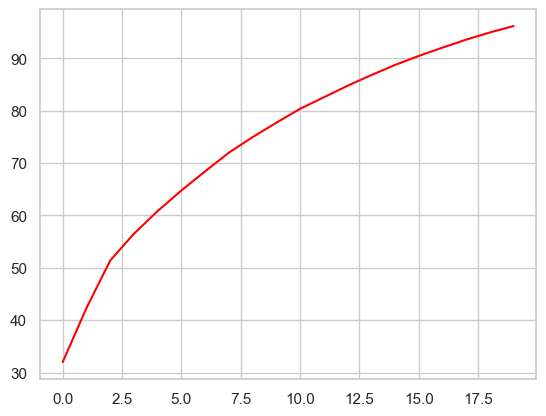

In [63]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")


we can see 90% of information has been from the first 15 columns, so we can take them for model building and ignore those remaining 10 columns which carries only 10% of information of dataset

In [64]:
pca_values[:,0:15]

array([[ 4.64285024, -0.62777524, -1.21079678, ...,  0.99131285,
        -0.16405823, -0.22907921],
       [-2.97759735,  0.35077426, -0.04388126, ..., -0.0628619 ,
        -0.20239962,  0.3218107 ],
       [ 2.22474573, -1.10060931, -1.39072844, ...,  0.1871175 ,
         0.68099672,  0.65503424],
       ...,
       [ 2.87773394, -1.05330492,  1.15617791, ...,  1.87547743,
        -1.47339897,  0.07220771],
       [ 1.2135999 ,  1.5119591 , -1.66499655, ..., -0.24531165,
         0.05571034,  0.18089929],
       [-2.53587469,  1.49173573,  0.65642638, ...,  0.22172371,
         0.10838335, -0.840417  ]])

In [65]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:15],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']), data[['Education','Marital_Status','Year_Birth','ID','Dt_Customer']]], axis = 1)
finalDf

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     4.642850 -0.627775 -1.210797  1.881080  1.387181  0.087806 -0.022093   
1    -2.977597  0.350774 -0.043881 -0.923479 -0.822466 -1.407222 -0.317666   
2     2.224746 -1.100609 -1.390728 -0.391211  1.218218 -0.110037 -0.533023   
3    -2.713036 -1.462493  0.425291  0.496722 -0.292699  0.542223 -0.969839   
4    -0.806152  0.084270 -0.683205  0.731696 -1.016620  1.948464  0.400455   
...        ...       ...       ...       ...       ...       ...       ...   
2235 -2.535875  1.491736  0.656426  0.417528 -0.112901 -1.475389 -0.857283   
2236       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2237       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2238       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2239       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0     0.157811 -1.319043 -0.190770  2.796906 -0.382140  0.991313 -0.164058   
1    -0.270464 -0.131510 -0.090980  0.579039 -0.113972 -0.062862 -0.202400   
2     0.128373  0.451050 -0.437717 -0.477840  0.254756  0.187118  0.680997   
3     0.036898  0.463532  0.169331 -0.543043  0.199842 -0.165271  0.056586   
4     0.026298 -0.335100  0.590540  0.327337  0.354370  0.274724  0.235668   
...        ...       ...       ...       ...       ...       ...       ...   
2235 -0.053680 -0.939558  0.085345  1.543613 -0.999026  0.221724  0.108383   
2236       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2237       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2238       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2239       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          pc15   Education Marital_Status  Year_Birth       ID Dt_Customer  
0    -0.229079  Graduation          Alone      1957.0   5524.0  2012-09-04  
1     0.321811  Graduation          Alone      1954.0   2174.0  2014-03-08  
2     0.655034  Graduation        Partner      1965.0   4141.0  2013-08-21  
3     0.206265  Graduation        Partner      1984.0   6182.0  2014-02-10  
4    -0.142250         PhD        Partner      1981.0   5324.0  2014-01-19  
...        ...         ...            ...         ...      ...         ...  
2235 -0.840417  Graduation        Partner      1967.0  10870.0  2013-06-13  
2236       NaN         PhD        Partner      1946.0   4001.0  2014-06-10  
2237       NaN  Graduation          Alone      1981.0   7270.0  2014-01-25  
2238       NaN      Master        Partner      1956.0   8235.0  2014-01-24  
2239       NaN         PhD        Partner      1954.0   9405.0  2012-10-15  

[2240 rows x 20 columns]

In [66]:
finalDf.isnull().sum()

pc1               4
pc2               4
pc3               4
pc4               4
pc5               4
pc6               4
pc7               4
pc8               4
pc9               4
pc10              4
pc11              4
pc12              4
pc13              4
pc14              4
pc15              4
Education         4
Marital_Status    4
Year_Birth        4
ID                4
Dt_Customer       4
dtype: int64

In [67]:
finalDf=finalDf.dropna()

In [68]:
finalDf.isnull().sum()

pc1               0
pc2               0
pc3               0
pc4               0
pc5               0
pc6               0
pc7               0
pc8               0
pc9               0
pc10              0
pc11              0
pc12              0
pc13              0
pc14              0
pc15              0
Education         0
Marital_Status    0
Year_Birth        0
ID                0
Dt_Customer       0
dtype: int64

In [69]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Creating cluster with std data
n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hcluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkages)
        hcluster1 = hcluster.fit_predict(std_data)
        silhouette_score1 = silhouette_score(std_data, hcluster1)
        print("For n_clusters =", n_clusters, "The average silhouette score with linkage =", linkages, ':', silhouette_score1)
    print()


For n_clusters = 2 The average silhouette score with linkage = ward : 0.30073476144213324
For n_clusters = 2 The average silhouette score with linkage = complete : 0.4868687438684
For n_clusters = 2 The average silhouette score with linkage = average : 0.5223393551628538
For n_clusters = 2 The average silhouette score with linkage = single : 0.46189217264863164

For n_clusters = 3 The average silhouette score with linkage = ward : 0.16849885005942988
For n_clusters = 3 The average silhouette score with linkage = complete : 0.4811689277080625
For n_clusters = 3 The average silhouette score with linkage = average : 0.4811689277080625
For n_clusters = 3 The average silhouette score with linkage = single : 0.4599435242492006

For n_clusters = 4 The average silhouette score with linkage = ward : 0.1753371603593272
For n_clusters = 4 The average silhouette score with linkage = complete : 0.45710672983397155
For n_clusters = 4 The average silhouette score with linkage = average : 0.4571067298

In [70]:
# creating cluster with minmax data

n_clusters=[2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward","complete","average","single"]:
        hcluster = AgglomerativeClustering(n_clusters=n_clusters, linkage = linkages)
        hcluster1=hcluster.fit_predict(minmax_data)
        silhouette_score1=silhouette_score(minmax_data,hcluster1)
        print("For n_clusters =",n_clusters,"The average silhouette score with linkage=",linkages,':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette score with linkage= ward : 0.3340823669919455
For n_clusters = 2 The average silhouette score with linkage= complete : 0.3326858760963871
For n_clusters = 2 The average silhouette score with linkage= average : 0.4080560070334789
For n_clusters = 2 The average silhouette score with linkage= single : 0.4080560070334789

For n_clusters = 3 The average silhouette score with linkage= ward : 0.18078641461259365
For n_clusters = 3 The average silhouette score with linkage= complete : 0.2544002335163232
For n_clusters = 3 The average silhouette score with linkage= average : 0.36202174195908643
For n_clusters = 3 The average silhouette score with linkage= single : 0.35096017440220634

For n_clusters = 4 The average silhouette score with linkage= ward : 0.1910178256336164
For n_clusters = 4 The average silhouette score with linkage= complete : 0.2535460272435184
For n_clusters = 4 The average silhouette score with linkage= average : 0.2861167952810802
Fo

## we are going with standardized data with n_clusters = 2 The average silhouette score with linkage= average : 0.4080560070334789

# Model Building

# Hierarchical Clustering

In [71]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
y_pred_hie = agg_clustering.fit_predict(std_data)
y_pred_hie

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
agg_clustering.n_connected_components_

1

In [73]:
(silhouette_score(std_data, agg_clustering.labels_)*100).round(3)

52.234

In [74]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

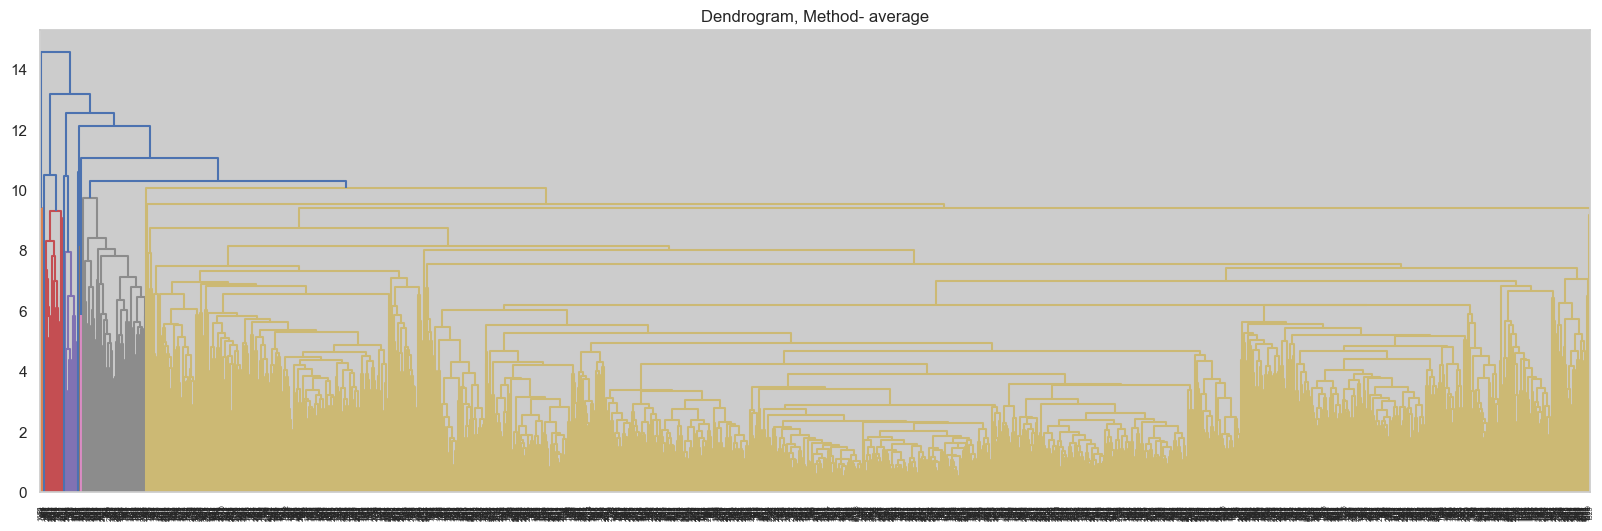

In [75]:
for method in ['average']:
    plt.figure(figsize=(20, 6))
    plt.title('Dendrogram, Method- {}'.format(method))
    Dendrogram2 = sch.dendrogram(sch.linkage(std_data, method=method, optimal_ordering=False))

In [76]:
# Adding cluster labels into the original dataset
data['Hie_Clustering'] = agg_clustering.labels_
data.head()

# Drop the 'Hie_Clustering' column
data.drop(['Hie_Clustering'], axis=1, inplace=True)

In [77]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation          Alone  58138.0        0         0   
1  2174        1954  Graduation          Alone  46344.0        1         1   
2  4141        1965  Graduation        Partner  71613.0        0         0   
3  6182        1984  Graduation        Partner  26646.0        1         0   
4  5324        1981         PhD        Partner  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   
3  2014-02-10       26        11  ...             0             0         0   
4  2014-01-19       94       173  ...             0             0         0   

   Response  Age  Spent  Total_acc_cmp  Children  Family_Size  Is_Parent  
0         1   58   1617              0         0            1          0  
1         0   61     27              0         2            3          1  
2         0   50    776              0         0            2          0  
3         0   31     53              0         1            3          1  
4         0   34    422              0         1            3          1  

[5 rows x 33 columns]

In [78]:
data['Hie_Clustering'] = agg_clustering.labels_
data.head()
data['Hie_Clustering'].value_counts()


0    2232
1       4
Name: Hie_Clustering, dtype: int64

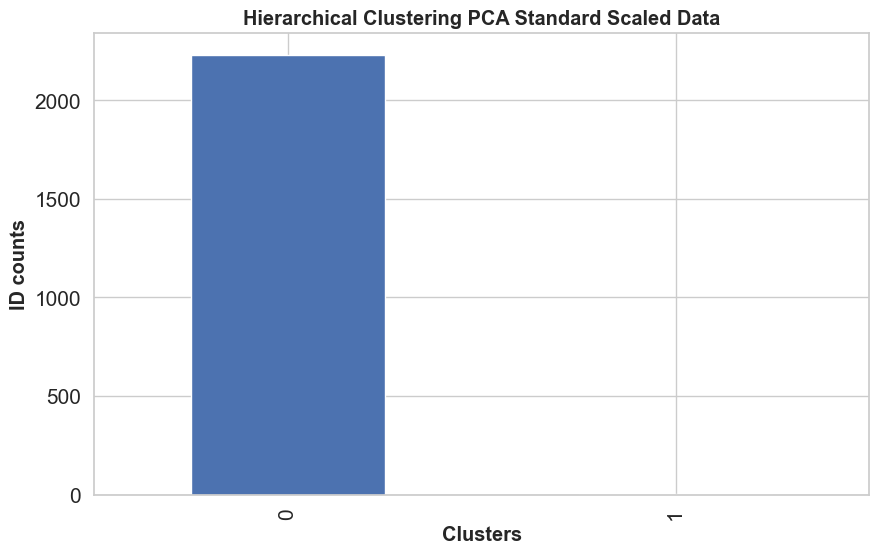

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [80]:
print('Values of Clusters: ', data['Hie_Clustering'].value_counts())

Values of Clusters:  0    2232
1       4
Name: Hie_Clustering, dtype: int64


In [81]:
data.groupby(['Hie_Clustering']).mean()

ID   Year_Birth         Income   Kidhome  Teenhome  \
Hie_Clustering                                                                
0               5589.937276  1968.882168   51841.032273  0.444444  0.507168   
1               5070.750000  1977.750000  119409.750000  0.250000  0.250000   

                  Recency    MntWines  MntFruits  MntMeatProducts  \
Hie_Clustering                                                      
0               49.126344  304.637993  26.314516       164.301523   
1               43.500000   19.250000   4.750000      1663.500000   

                MntFishProducts  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
Hie_Clustering                   ...                                         
0                     37.594086  ...      0.064516      0.013441  0.008961   
1                      5.250000  ...      0.000000      0.000000  0.000000   

                Response        Age        Spent  Total_acc_cmp  Children  \
Hie_Clustering                                                              
0               0.149642  46.117832   604.032706       0.298387  0.951613   
1               0.000000  37.250000  1696.250000       0.000000  0.500000   

                Family_Size  Is_Parent  
Hie_Clustering                          
0                  2.595878   0.715502  
1                  2.500000   0.500000  

[2 rows x 30 columns]

# K-Means Clustering

To choose right number of clusters (k value) we use elbow curve in kmeans clustering

In [82]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

In [83]:
cluster_nums = [2,3,4,5,6,7]
scores = []
errors = []

for cluster_num in cluster_nums:
    kmeans = KMeans(cluster_num, random_state=0)
    kmeans.fit(std_data)
    errors.append(kmeans.inertia_)
    clusters = kmeans.predict(std_data)
    silhouette = silhouette_score(std_data, clusters)
    scores.append(silhouette)


print(scores)



[0.2803893209865238, 0.2050838913584589, 0.20801972683396994, 0.1497972537723143, 0.15436215791688698, 0.16055892789938167]


Silhouette Score: Calculate the silhouette score for different values of k. A higher silhouette score indicates better-defined clusters, helping you choose the optimal k.

Text(0.5, 1.0, 'Silhouette Score by n clusters')

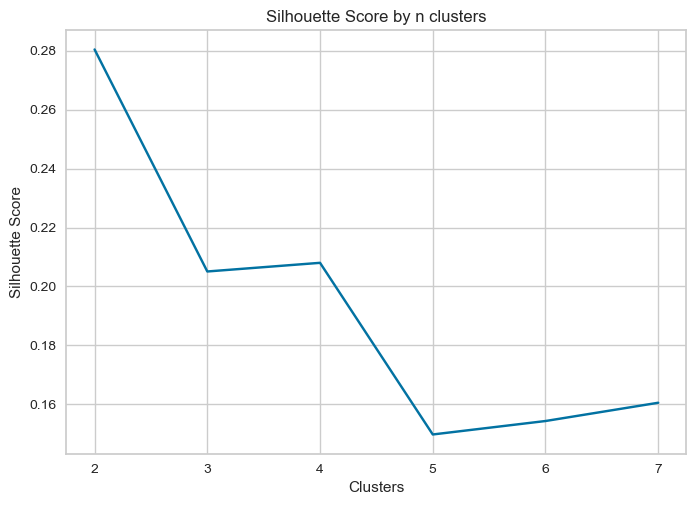

In [84]:
 # Silhouette Score
sns.set_style('whitegrid')
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
sns.lineplot(x=cluster_nums,y=scores)
plt.title('Silhouette Score by n clusters')

In [85]:
#Train the model with 2 clusters #we have got

kmeans_2 = KMeans(n_clusters=2, random_state=25)
kmeans_2.fit(std_data)

KMeans(n_clusters=2, random_state=25)

In [86]:
data['KMeans_Clustering'] = kmeans_2.labels_

In [87]:
kmeans2_labels = kmeans_2.predict(std_data)

pd.Series(kmeans2_labels).value_counts()

1    1409
0     827
dtype: int64

Text(0.5, 1.0, 'Clusters using K-Means Clustering')

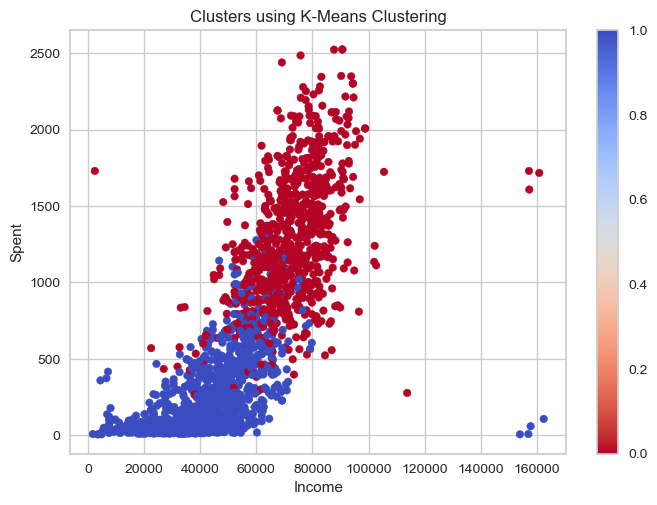

In [88]:
data.plot(x="Income",y ="Spent",c=kmeans_2.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm_r)#plotting our build model on scatter plot
plt.title('Clusters using K-Means Clustering')

<AxesSubplot:>

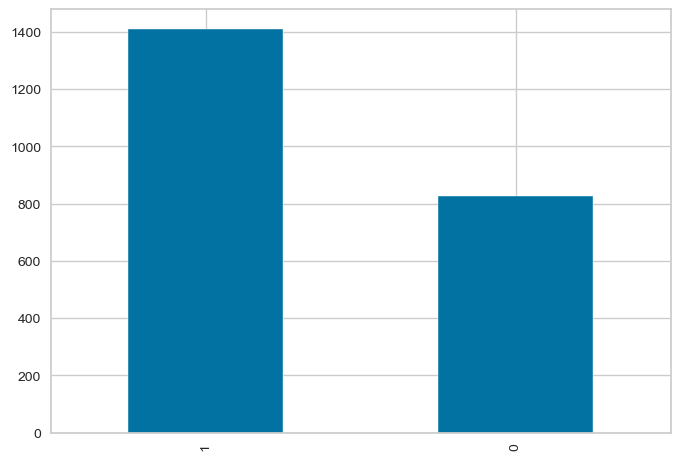

In [89]:
data['KMeans_Clustering'].value_counts().plot(kind='bar')

In [90]:
print('Values of Clusters: ', data['KMeans_Clustering'].value_counts())

Values of Clusters:  1    1409
0     827
Name: KMeans_Clustering, dtype: int64


In [91]:
data.groupby(['KMeans_Clustering']).mean()

ID   Year_Birth        Income   Kidhome  Teenhome  \
KMeans_Clustering                                                               
0                  5576.263603  1967.392987  71960.046564  0.049577  0.360339   
1                  5596.488999  1969.781405  40224.176384  0.675656  0.592619   

                     Recency    MntWines  MntFruits  MntMeatProducts  \
KMeans_Clustering                                                      
0                  49.467956  609.501814  58.162031       378.765417   
1                  48.909865  124.890703   7.560681        42.679915   

                   MntFishProducts  ...  AcceptedCmp2  Complain  Response  \
KMeans_Clustering                   ...                                     
0                        83.455865  ...      0.033857  0.007255  0.244256   
1                        10.584102  ...      0.001419  0.009936  0.093683   

                         Age        Spent  Total_acc_cmp  Children  \
KMeans_Clustering                                                    
0                  47.607013  1267.064087       0.619105  0.409915   
1                  45.218595   217.973031       0.109297  1.268275   

                   Family_Size  Is_Parent  Hie_Clustering  
KMeans_Clustering                                          
0                     2.027811   0.388150        0.004837  
1                     2.929028   0.907026        0.000000  

[2 rows x 31 columns]

# DBSCAN

For DBSCAN Clustering to know the efficient eps value we use K distance graph

In [92]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=70) # 2n(28*2)
nbrs = neigh.fit(std_data)
distances, indices = nbrs.kneighbors(std_data)

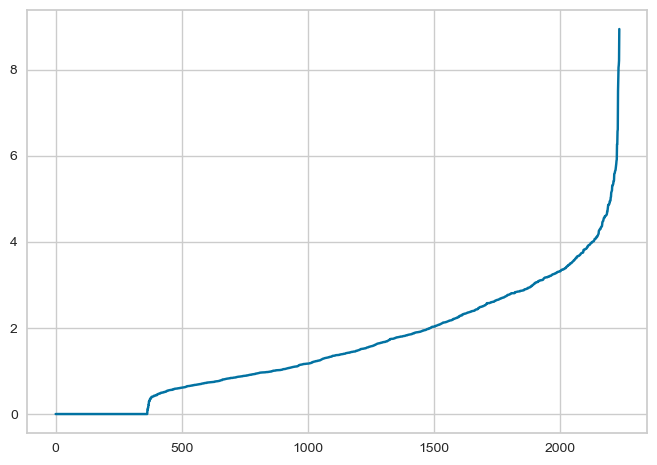

In [93]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In the K-distance graph, look for an "elbow" point, which is where the curve starts to level off.

From the K-Distance graph we can take eps value as 4.75 approximately

In [94]:
dbscan = DBSCAN(eps=4.75, min_samples=28) #d+1(29+1)
dbscan.fit(std_data)

DBSCAN(eps=4.75, min_samples=28)

In [95]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

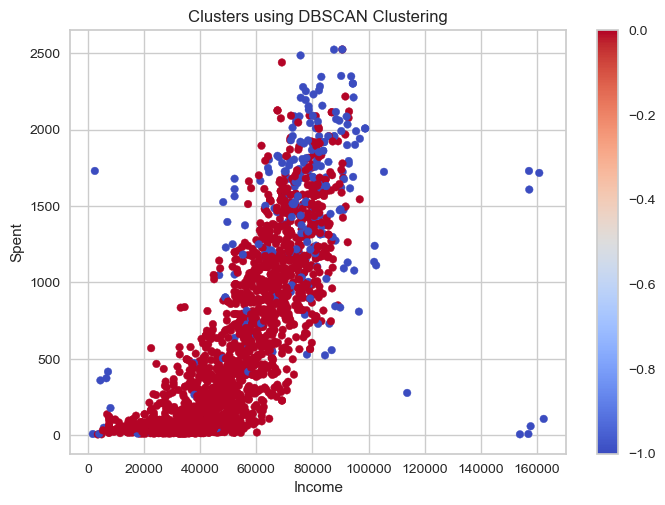

In [96]:
data.plot(x="Income",y ="Spent",c=dbscan.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [97]:
data['clust'] = dbscan.labels_
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  Age  Spent  \
0            0  2012-09-04       58       635  ...         1   58   1617   
1            1  2014-03-08       38        11  ...         0   61     27   
2            0  2013-08-21       26       426  ...         0   50    776   
3            0  2014-02-10       26        11  ...         0   31     53   
4            0  2014-01-19       94       173  ...         0   34    422   
...        ...         ...      ...       ...  ...       ...  ...    ...   
2235         1  2013-06-13       46       709  ...         0   48   1341   
2236         1  2014-06-10       56       406  ...         0   69    444   
2237         0  2014-01-25       91       908  ...         0   34   1241   
2238         1  2014-01-24        8       428  ...         0   59    843   
2239         1  2012-10-15       40        84  ...         1   61    172   

      Total_acc_cmp  Children  Family_Size  Is_Parent  Hie_Clustering  \
0                 0         0            1          0               0   
1                 0         2            3          1               0   
2                 0         0            2          0               0   
3                 0         1            3          1               0   
4                 0         1            3          1               0   
...             ...       ...          ...        ...             ...   
2235              0         1            3          1               0   
2236              1         3            5          1               0   
2237              1         0            1          0               0   
2238              0         1            3          1               0   
2239              0         2            4          1               0   

      KMeans_Clustering  clust  
0                     0      0  
1                     1      0  
2                     0      0  
3                     1      0  
4                     1      0  
...                 ...    ...  
2235                  0      0  
2236                  1      0  
2237                  0      0  
2238                  0      0  
2239                  1      0  

[2236 rows x 36 columns]

<AxesSubplot:>

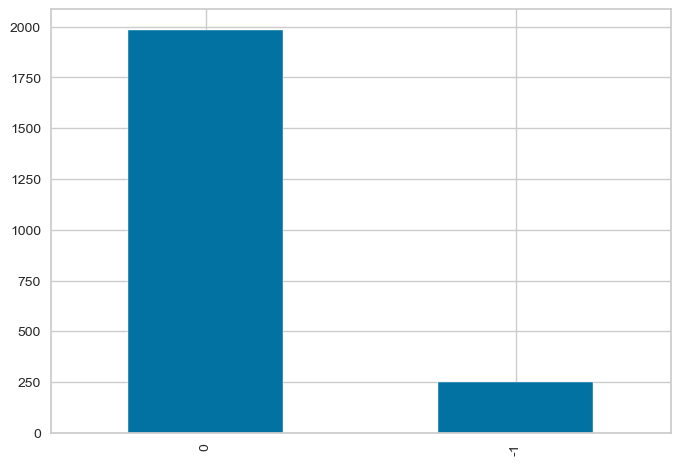

In [98]:
data['clust'].value_counts().plot(kind='bar')

In [99]:
data['clust'].unique()

array([ 0, -1], dtype=int64)

In [100]:
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Finding the silhoutte score

In [101]:
sc_1db4_75 = silhouette_score(std_data, dbscan.labels_)  # silhouette_score
sc_1db4_75

0.3662923535454476

Experimenting with different eps values and min_samples to see if there will be any increase in sillhouette score

In [102]:
dbscan1= DBSCAN(eps=5.50, min_samples=35) #d+1(29+1)
dbscan1.fit(std_data)

DBSCAN(eps=5.5, min_samples=35)

In [103]:
dbscan1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

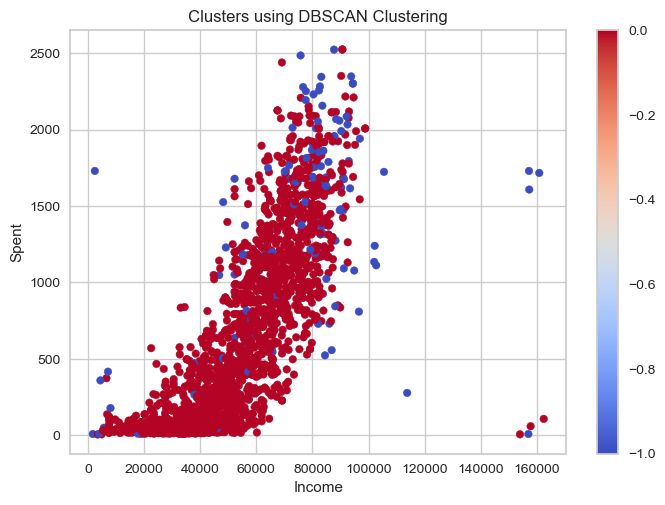

In [104]:
data.plot(x="Income",y ="Spent",c=dbscan1.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [105]:
data['clust'] = dbscan1.labels_
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  Age  Spent  \
0            0  2012-09-04       58       635  ...         1   58   1617   
1            1  2014-03-08       38        11  ...         0   61     27   
2            0  2013-08-21       26       426  ...         0   50    776   
3            0  2014-02-10       26        11  ...         0   31     53   
4            0  2014-01-19       94       173  ...         0   34    422   
...        ...         ...      ...       ...  ...       ...  ...    ...   
2235         1  2013-06-13       46       709  ...         0   48   1341   
2236         1  2014-06-10       56       406  ...         0   69    444   
2237         0  2014-01-25       91       908  ...         0   34   1241   
2238         1  2014-01-24        8       428  ...         0   59    843   
2239         1  2012-10-15       40        84  ...         1   61    172   

      Total_acc_cmp  Children  Family_Size  Is_Parent  Hie_Clustering  \
0                 0         0            1          0               0   
1                 0         2            3          1               0   
2                 0         0            2          0               0   
3                 0         1            3          1               0   
4                 0         1            3          1               0   
...             ...       ...          ...        ...             ...   
2235              0         1            3          1               0   
2236              1         3            5          1               0   
2237              1         0            1          0               0   
2238              0         1            3          1               0   
2239              0         2            4          1               0   

      KMeans_Clustering  clust  
0                     0      0  
1                     1      0  
2                     0      0  
3                     1      0  
4                     1      0  
...                 ...    ...  
2235                  0      0  
2236                  1      0  
2237                  0      0  
2238                  0      0  
2239                  1      0  

[2236 rows x 36 columns]

<AxesSubplot:>

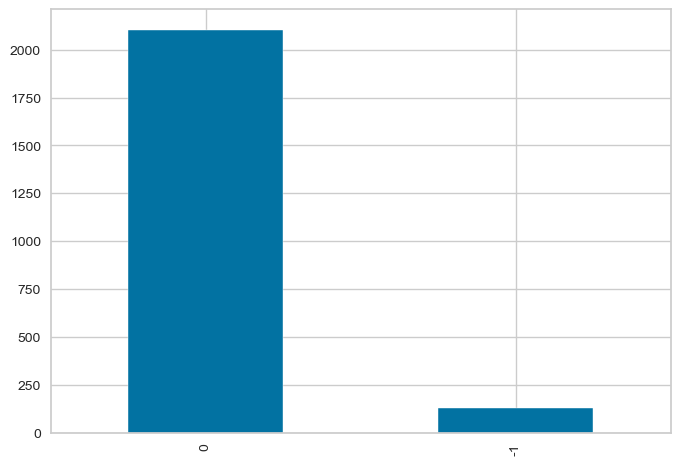

In [106]:
data['clust'].value_counts().plot(kind='bar')

In [107]:
sc_1db5_50=sklearn.metrics.silhouette_score(std_data,dbscan1.labels_)  #silhouette_score
sc_1db5_50

0.42218128065138133

In [108]:
dbscan2= DBSCAN(eps=6.0, min_samples=40) #eps=6
dbscan2.fit(std_data)

DBSCAN(eps=6.0, min_samples=40)

In [109]:
dbscan2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

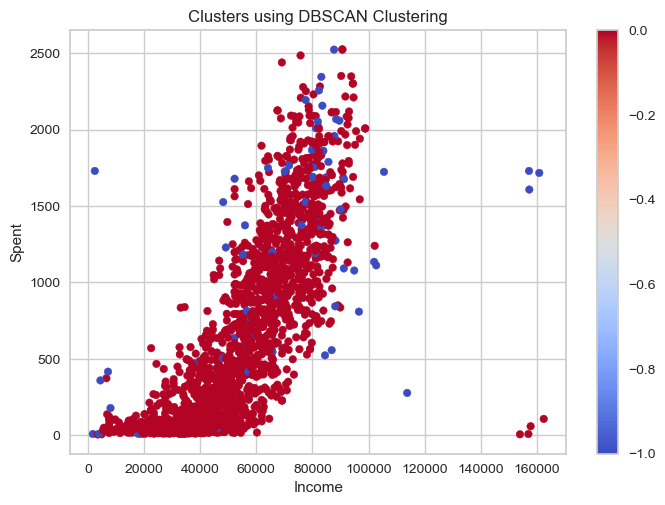

In [110]:
data.plot(x="Income",y ="Spent",c=dbscan2.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [111]:
data['clust'] = dbscan2.labels_
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  Age  Spent  \
0            0  2012-09-04       58       635  ...         1   58   1617   
1            1  2014-03-08       38        11  ...         0   61     27   
2            0  2013-08-21       26       426  ...         0   50    776   
3            0  2014-02-10       26        11  ...         0   31     53   
4            0  2014-01-19       94       173  ...         0   34    422   
...        ...         ...      ...       ...  ...       ...  ...    ...   
2235         1  2013-06-13       46       709  ...         0   48   1341   
2236         1  2014-06-10       56       406  ...         0   69    444   
2237         0  2014-01-25       91       908  ...         0   34   1241   
2238         1  2014-01-24        8       428  ...         0   59    843   
2239         1  2012-10-15       40        84  ...         1   61    172   

      Total_acc_cmp  Children  Family_Size  Is_Parent  Hie_Clustering  \
0                 0         0            1          0               0   
1                 0         2            3          1               0   
2                 0         0            2          0               0   
3                 0         1            3          1               0   
4                 0         1            3          1               0   
...             ...       ...          ...        ...             ...   
2235              0         1            3          1               0   
2236              1         3            5          1               0   
2237              1         0            1          0               0   
2238              0         1            3          1               0   
2239              0         2            4          1               0   

      KMeans_Clustering  clust  
0                     0      0  
1                     1      0  
2                     0      0  
3                     1      0  
4                     1      0  
...                 ...    ...  
2235                  0      0  
2236                  1      0  
2237                  0      0  
2238                  0      0  
2239                  1      0  

[2236 rows x 36 columns]

<AxesSubplot:>

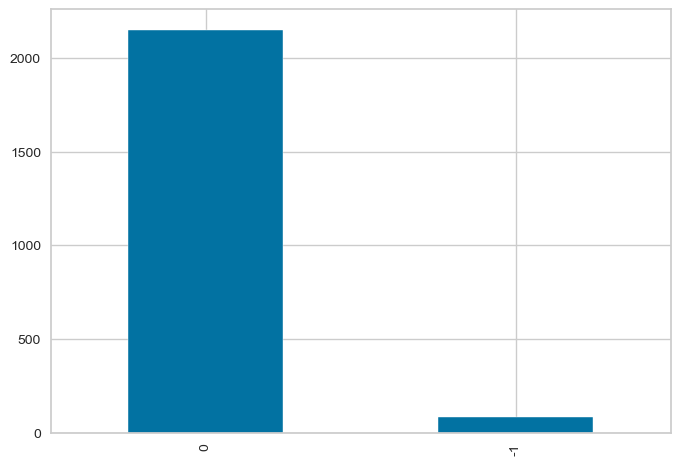

In [112]:
data['clust'].value_counts().plot(kind='bar')

In [113]:
sc_1db6=sklearn.metrics.silhouette_score(std_data,dbscan2.labels_)  #silhouette_score
sc_1db6

0.4479774613604146

In [114]:
dbscan3= DBSCAN(eps=7.0, min_samples=50) #eps=7
dbscan3.fit(std_data)

DBSCAN(eps=7.0, min_samples=50)

In [115]:
dbscan3.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

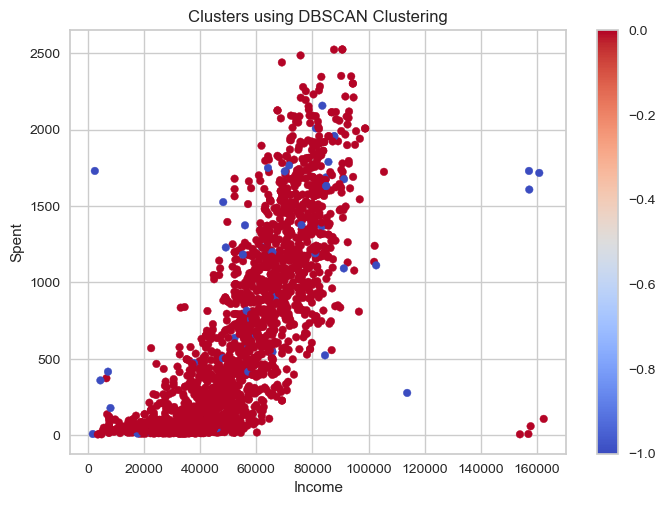

In [116]:
data.plot(x="Income",y ="Spent",c=dbscan3.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [117]:
data['clust'] = dbscan3.labels_
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  Age  Spent  \
0            0  2012-09-04       58       635  ...         1   58   1617   
1            1  2014-03-08       38        11  ...         0   61     27   
2            0  2013-08-21       26       426  ...         0   50    776   
3            0  2014-02-10       26        11  ...         0   31     53   
4            0  2014-01-19       94       173  ...         0   34    422   
...        ...         ...      ...       ...  ...       ...  ...    ...   
2235         1  2013-06-13       46       709  ...         0   48   1341   
2236         1  2014-06-10       56       406  ...         0   69    444   
2237         0  2014-01-25       91       908  ...         0   34   1241   
2238         1  2014-01-24        8       428  ...         0   59    843   
2239         1  2012-10-15       40        84  ...         1   61    172   

      Total_acc_cmp  Children  Family_Size  Is_Parent  Hie_Clustering  \
0                 0         0            1          0               0   
1                 0         2            3          1               0   
2                 0         0            2          0               0   
3                 0         1            3          1               0   
4                 0         1            3          1               0   
...             ...       ...          ...        ...             ...   
2235              0         1            3          1               0   
2236              1         3            5          1               0   
2237              1         0            1          0               0   
2238              0         1            3          1               0   
2239              0         2            4          1               0   

      KMeans_Clustering  clust  
0                     0      0  
1                     1      0  
2                     0      0  
3                     1      0  
4                     1      0  
...                 ...    ...  
2235                  0      0  
2236                  1      0  
2237                  0      0  
2238                  0      0  
2239                  1      0  

[2236 rows x 36 columns]

<AxesSubplot:>

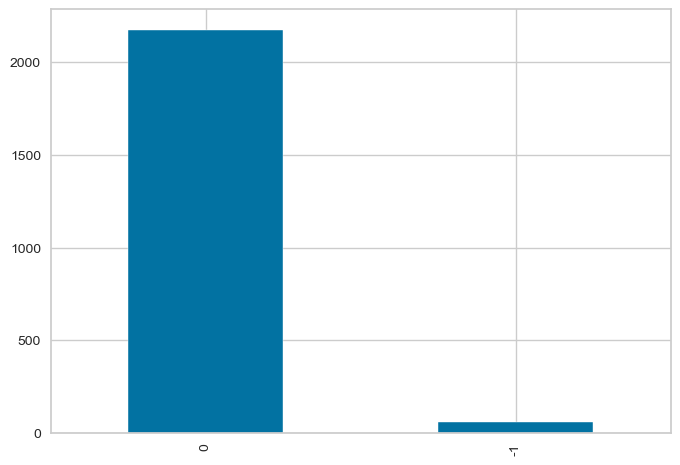

In [118]:
data['clust'].value_counts().plot(kind='bar')

In [119]:
sc_1db7=sklearn.metrics.silhouette_score(std_data,dbscan3.labels_)  #silhouette_score
sc_1db7

0.472298391874187

In [120]:
dbscan4 = DBSCAN(eps= 7.7, min_samples=55) # for eps = 7.7
dbscan4.fit(std_data)

DBSCAN(eps=7.7, min_samples=55)

In [121]:
dbscan4.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

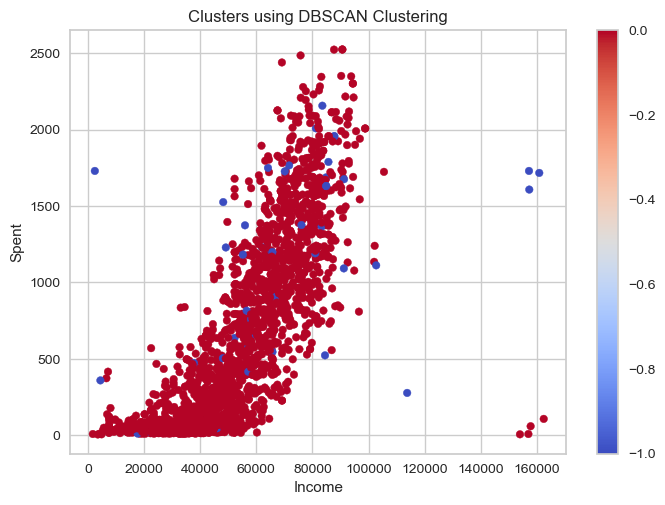

In [122]:
data.plot(x="Income",y ="Spent",c=dbscan4.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [123]:
data['clust'] = dbscan4.labels_
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  Age  Spent  \
0            0  2012-09-04       58       635  ...         1   58   1617   
1            1  2014-03-08       38        11  ...         0   61     27   
2            0  2013-08-21       26       426  ...         0   50    776   
3            0  2014-02-10       26        11  ...         0   31     53   
4            0  2014-01-19       94       173  ...         0   34    422   
...        ...         ...      ...       ...  ...       ...  ...    ...   
2235         1  2013-06-13       46       709  ...         0   48   1341   
2236         1  2014-06-10       56       406  ...         0   69    444   
2237         0  2014-01-25       91       908  ...         0   34   1241   
2238         1  2014-01-24        8       428  ...         0   59    843   
2239         1  2012-10-15       40        84  ...         1   61    172   

      Total_acc_cmp  Children  Family_Size  Is_Parent  Hie_Clustering  \
0                 0         0            1          0               0   
1                 0         2            3          1               0   
2                 0         0            2          0               0   
3                 0         1            3          1               0   
4                 0         1            3          1               0   
...             ...       ...          ...        ...             ...   
2235              0         1            3          1               0   
2236              1         3            5          1               0   
2237              1         0            1          0               0   
2238              0         1            3          1               0   
2239              0         2            4          1               0   

      KMeans_Clustering  clust  
0                     0      0  
1                     1      0  
2                     0      0  
3                     1      0  
4                     1      0  
...                 ...    ...  
2235                  0      0  
2236                  1      0  
2237                  0      0  
2238                  0      0  
2239                  1      0  

[2236 rows x 36 columns]

<AxesSubplot:>

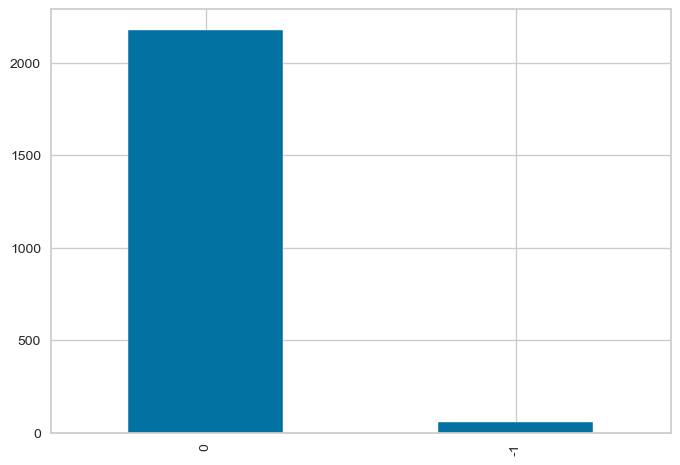

In [124]:
data['clust'].value_counts().plot(kind='bar')

In [125]:
sc_1db7=sklearn.metrics.silhouette_score(std_data,dbscan4.labels_)  #silhouette_score
sc_1db7

0.47619174330326175

In [126]:
dbscan5= DBSCAN(eps=8.0, min_samples=60) #eps 8.0
dbscan5.fit(std_data)

DBSCAN(eps=8.0, min_samples=60)

In [127]:
dbscan5.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

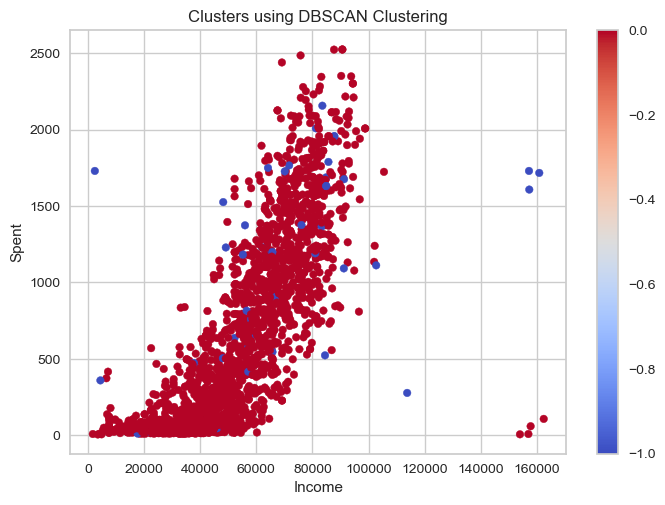

In [128]:
data.plot(x="Income",y ="Spent",c=dbscan5.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [129]:
data['clust'] = dbscan5.labels_
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation          Alone  58138.0        0   
1      2174        1954  Graduation          Alone  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation          Alone  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  Age  Spent  \
0            0  2012-09-04       58       635  ...         1   58   1617   
1            1  2014-03-08       38        11  ...         0   61     27   
2            0  2013-08-21       26       426  ...         0   50    776   
3            0  2014-02-10       26        11  ...         0   31     53   
4            0  2014-01-19       94       173  ...         0   34    422   
...        ...         ...      ...       ...  ...       ...  ...    ...   
2235         1  2013-06-13       46       709  ...         0   48   1341   
2236         1  2014-06-10       56       406  ...         0   69    444   
2237         0  2014-01-25       91       908  ...         0   34   1241   
2238         1  2014-01-24        8       428  ...         0   59    843   
2239         1  2012-10-15       40        84  ...         1   61    172   

      Total_acc_cmp  Children  Family_Size  Is_Parent  Hie_Clustering  \
0                 0         0            1          0               0   
1                 0         2            3          1               0   
2                 0         0            2          0               0   
3                 0         1            3          1               0   
4                 0         1            3          1               0   
...             ...       ...          ...        ...             ...   
2235              0         1            3          1               0   
2236              1         3            5          1               0   
2237              1         0            1          0               0   
2238              0         1            3          1               0   
2239              0         2            4          1               0   

      KMeans_Clustering  clust  
0                     0      0  
1                     1      0  
2                     0      0  
3                     1      0  
4                     1      0  
...                 ...    ...  
2235                  0      0  
2236                  1      0  
2237                  0      0  
2238                  0      0  
2239                  1      0  

[2236 rows x 36 columns]

<AxesSubplot:>

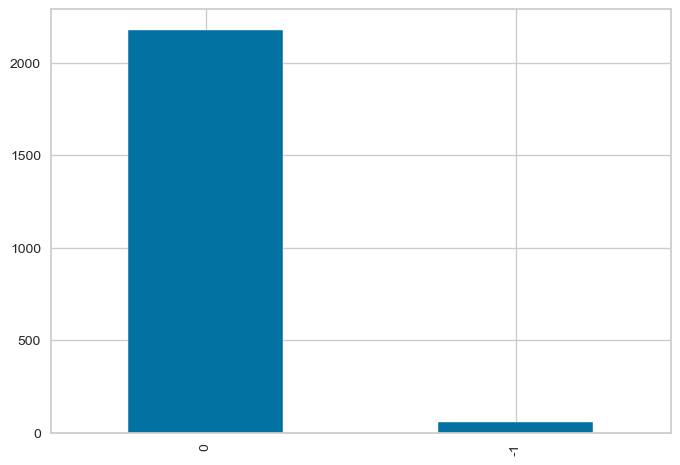

In [130]:
data['clust'].value_counts().plot(kind='bar')

In [131]:
sc_1db7=sklearn.metrics.silhouette_score(std_data,dbscan5.labels_)  #silhouette_score
sc_1db7

0.47619174330326175

We have run the 5 DBSCAN
The final silhoutte score is 0.5518362895370283
We have tried this for eps= 8 and min values= 60

# Splitting the data

In [132]:
from sklearn.model_selection import train_test_split

In [134]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation          Alone  58138.0        0         0   
1  2174        1954  Graduation          Alone  46344.0        1         1   
2  4141        1965  Graduation        Partner  71613.0        0         0   
3  6182        1984  Graduation        Partner  26646.0        1         0   
4  5324        1981         PhD        Partner  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Response  Age  Spent  Total_acc_cmp  \
0  2012-09-04       58       635  ...         1   58   1617              0   
1  2014-03-08       38        11  ...         0   61     27              0   
2  2013-08-21       26       426  ...         0   50    776              0   
3  2014-02-10       26        11  ...         0   31     53              0   
4  2014-01-19       94       173  ...         0   34    422              0   

   Children  Family_Size  Is_Parent  Hie_Clustering  KMeans_Clustering  clust  
0         0            1          0               0                  0      0  
1         2            3          1               0                  1      0  
2         0            2          0               0                  0      0  
3         1            3          1               0                  1      0  
4         1            3          1               0                  1      0  

[5 rows x 36 columns]

In [135]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
model_data = data.drop(['Hie_Clustering','clust'],axis=1)
model_data['Education']= label_encoder.fit_transform(data['Education'])
model_data['Marital_Status']= label_encoder.fit_transform(data['Marital_Status'])
model_data.drop(['Dt_Customer'],axis=1, inplace=True)

In [136]:
model_data.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               0  58138.0        0         0   
1  2174        1954          2               0  46344.0        1         1   
2  4141        1965          2               1  71613.0        0         0   
3  6182        1984          2               1  26646.0        1         0   
4  5324        1981          4               1  58293.0        1         0   

   Recency  MntWines  MntFruits  ...  AcceptedCmp2  Complain  Response  Age  \
0       58       635         88  ...             0         0         1   58   
1       38        11          1  ...             0         0         0   61   
2       26       426         49  ...             0         0         0   50   
3       26        11          4  ...             0         0         0   31   
4       94       173         43  ...             0         0         0   34   

   Spent  Total_acc_cmp  Children  Family_Size  Is_Parent  KMeans_Clustering  
0   1617              0         0            1          0                  0  
1     27              0         2            3          1                  1  
2    776              0         0            2          0                  0  
3     53              0         1            3          1                  1  
4    422              0         1            3          1                  1  

[5 rows x 33 columns]

In [138]:
X = model_data.iloc[:,0:32]
Y = model_data.iloc[:,32]

In [139]:
x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size = 0.2, random_state = 42)

In [140]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1788, 32) (448, 32) (1788,) (448,)


# Model Building

In [141]:
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report as report

#### 1. Naive Bayes Classifier

In [142]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

##### Gaussian Naive Bayes

In [143]:
#instantiating the object
model_GNB = GaussianNB()

#fit the model
model_GNB.fit(x_train, y_train)

GaussianNB()

In [144]:
#prediction
y_pred_GNB = model_GNB.predict(x_test)

In [145]:
#Accuracy
#first argument is true values, second argument is predicted values
model_GNB_score = accuracy_score(y_test,y_pred_GNB)
print('GaussianNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_GNB)))

GaussianNB Model accuracy score: 0.9688


##### Multinomial Naive Bayes

In [146]:
#instantiating the object
model_MNB = MultinomialNB()

#fit the model
model_MNB.fit(x_train, y_train)

MultinomialNB()

In [147]:
#prediction
y_pred_MNB = model_MNB.predict(x_test)

#Accuracy
#first argument is true values, second argument is predicted values
model_MNB_score = accuracy_score(y_test,y_pred_MNB)
print('MultinomialNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_MNB)))

MultinomialNB Model accuracy score: 0.8147


##### Bernoulli Naive Bayes

In [148]:
#instantiating the object
model_BNB = BernoulliNB()

#fit the model
model_BNB.fit(x_train, y_train)

#prediction
y_pred_BNB = model_BNB.predict(x_test)

#Accuracy
#first argument is true values, second argument is predicted values
model_BNB_score = accuracy_score(y_test,y_pred_BNB)
print('BernoulliNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_BNB)))

BernoulliNB Model accuracy score: 0.8594


In [149]:
# Classification_reports

print('GaussianNB Model','\n', report(y_test, y_pred_GNB))
print('MultinomialNB Model','\n',report(y_test, y_pred_MNB))
print('BernoulliNB Model','\n',report(y_test, y_pred_BNB))

GaussianNB Model 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       172
           1       0.99      0.96      0.97       276

    accuracy                           0.97       448
   macro avg       0.96      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448

MultinomialNB Model 
               precision    recall  f1-score   support

           0       0.71      0.88      0.79       172
           1       0.91      0.77      0.84       276

    accuracy                           0.81       448
   macro avg       0.81      0.83      0.81       448
weighted avg       0.83      0.81      0.82       448

BernoulliNB Model 
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       172
           1       0.84      0.95      0.89       276

    accuracy                           0.86       448
   macro avg       0.87      0.83      0.84       448
weighted avg 

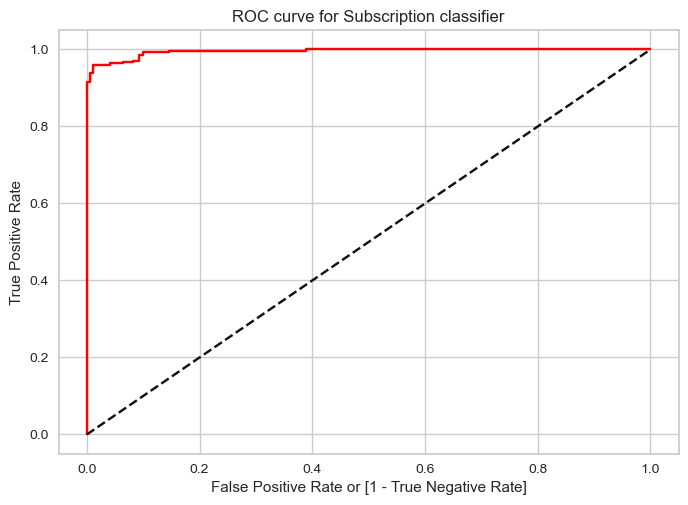

AUC-ROC Score: 0.9724469160768453


In [150]:
# ROC Curve plotting and finding AUC value

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model_GNB.predict_proba (x_test)[:,1])
auc = roc_auc_score(y_test, y_pred_GNB)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc) 

###### 2. Decision Tree

In [151]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [152]:
# Decision Tree Classifier with criteria as entropy

model_DT = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model_DT.fit(x_train,y_train) 

#Predicting on test data
pred = model_DT.predict(x_test) 
pred 

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [153]:
pd.crosstab(y_test,pred)

col_0                0    1
KMeans_Clustering          
0                  167    5
1                    9  267

In [154]:
# Accuracy 
np.mean(pred==y_test)  

0.96875

In [155]:
Model_DT_score = accuracy_score(y_test, pred)
Model_DT_score
print(" Decision Tree Classifier with Entropy: ")
print(report(y_test, pred))

 Decision Tree Classifier with Entropy: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       172
           1       0.98      0.97      0.97       276

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



[Text(0.5625, 0.9, 'X[27] <= 638.5\nentropy = 0.948\nsamples = 1788\nvalue = [655, 1133]'),
 Text(0.3333333333333333, 0.7, 'X[12] <= 42.5\nentropy = 0.169\nsamples = 1075\nvalue = [27, 1048]'),
 Text(0.16666666666666666, 0.5, 'X[16] <= 3.5\nentropy = 0.091\nsamples = 1041\nvalue = [12, 1029]'),
 Text(0.08333333333333333, 0.3, 'X[16] <= 1.5\nentropy = 0.029\nsamples = 1003\nvalue = [3, 1000]'),
 Text(0.041666666666666664, 0.1, 'entropy = 0.0\nsamples = 847\nvalue = [0, 847]'),
 Text(0.125, 0.1, 'entropy = 0.137\nsamples = 156\nvalue = [3, 153]'),
 Text(0.25, 0.3, 'X[30] <= 2.5\nentropy = 0.79\nsamples = 38\nvalue = [9, 29]'),
 Text(0.20833333333333334, 0.1, 'entropy = 0.998\nsamples = 17\nvalue = [9, 8]'),
 Text(0.2916666666666667, 0.1, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.5, 0.5, 'X[31] <= 0.5\nentropy = 0.99\nsamples = 34\nvalue = [15, 19]'),
 Text(0.4166666666666667, 0.3, 'X[27] <= 270.0\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.375, 0.1, 'entropy

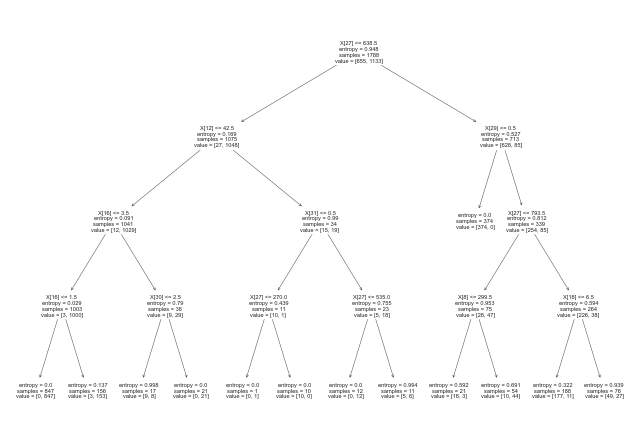

In [156]:
tree.plot_tree(model_DT)

In [157]:
# Decision Tree Classifier with criteria as Gini

model_DT2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model_DT2.fit(x_train,y_train) 

#Predicting on test data
pred2 = model_DT.predict(x_test) 
pred2

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [158]:
pd.crosstab(y_test,pred2)

col_0                0    1
KMeans_Clustering          
0                  167    5
1                    9  267

In [159]:
# Accuracy 
np.mean(pred2==y_test)  

0.96875

In [160]:
Model_DT2_Score = accuracy_score(y_test, pred)
print("Decision Tree Classifier with GINI")
print(report(y_test,pred2))

Decision Tree Classifier with GINI
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       172
           1       0.98      0.97      0.97       276

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



[Text(0.5625, 0.9, 'X[27] <= 638.5\nentropy = 0.948\nsamples = 1788\nvalue = [655, 1133]'),
 Text(0.3333333333333333, 0.7, 'X[12] <= 42.5\nentropy = 0.169\nsamples = 1075\nvalue = [27, 1048]'),
 Text(0.16666666666666666, 0.5, 'X[16] <= 3.5\nentropy = 0.091\nsamples = 1041\nvalue = [12, 1029]'),
 Text(0.08333333333333333, 0.3, 'X[16] <= 1.5\nentropy = 0.029\nsamples = 1003\nvalue = [3, 1000]'),
 Text(0.041666666666666664, 0.1, 'entropy = 0.0\nsamples = 847\nvalue = [0, 847]'),
 Text(0.125, 0.1, 'entropy = 0.137\nsamples = 156\nvalue = [3, 153]'),
 Text(0.25, 0.3, 'X[30] <= 2.5\nentropy = 0.79\nsamples = 38\nvalue = [9, 29]'),
 Text(0.20833333333333334, 0.1, 'entropy = 0.998\nsamples = 17\nvalue = [9, 8]'),
 Text(0.2916666666666667, 0.1, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.5, 0.5, 'X[31] <= 0.5\nentropy = 0.99\nsamples = 34\nvalue = [15, 19]'),
 Text(0.4166666666666667, 0.3, 'X[26] <= 28.0\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.375, 0.1, 'entropy 

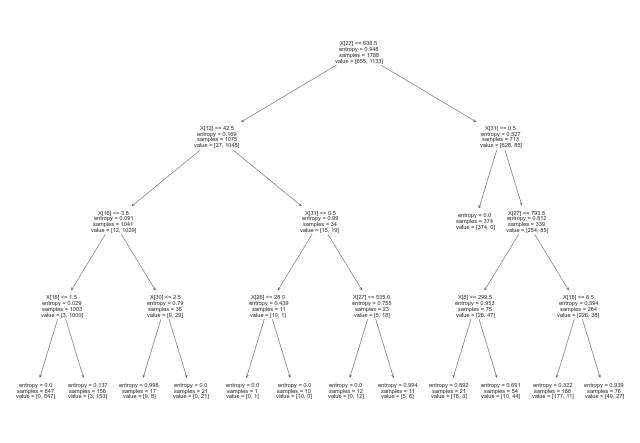

In [161]:
tree.plot_tree(model_DT2)

### 3. KNN classifier

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
model_KNN=KNeighborsClassifier(n_neighbors=10)
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [164]:
pred_knn = model_KNN.predict(x_test)

In [165]:
pd.crosstab(y_test,pred_knn)

col_0                0    1
KMeans_Clustering          
0                  152   20
1                   22  254

In [166]:
Model_KNN_score= accuracy_score(y_test,pred_knn)
Model_KNN_score

0.90625

In [167]:
print(report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       172
           1       0.93      0.92      0.92       276

    accuracy                           0.91       448
   macro avg       0.90      0.90      0.90       448
weighted avg       0.91      0.91      0.91       448



### 4. Support Vector Machine

In [168]:
from sklearn import svm
from sklearn.svm import SVC

In [169]:
# SVM Classification
svm = SVC()
svm.fit(x_train,y_train)

svm_preds = svm.predict(x_test)

In [170]:
Model_SVM_score= accuracy_score(y_test,svm_preds)
Model_SVM_score


0.9151785714285714

In [171]:
print(report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       172
           1       0.93      0.92      0.92       276

    accuracy                           0.91       448
   macro avg       0.90      0.90      0.90       448
weighted avg       0.91      0.91      0.91       448



### 5. XGBoost

In [172]:
from xgboost import XGBClassifier

In [173]:
model_xgboost = XGBClassifier(n_estimators = 100, max_depth =3)
model_xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [174]:
y_pred_xgboost = model_xgboost.predict(x_test)

In [175]:
model_xgboost_score= accuracy_score(y_test, y_pred_xgboost)
model_xgboost_score

0.9821428571428571

### 6.Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
model_LR = LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

In [178]:
LR_preds = model_LR.predict(x_test)

In [179]:
model_LR_score = accuracy_score(y_test,LR_preds)
model_LR_score

0.953125

### 7. Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
model_RFC = RandomForestClassifier(n_estimators = 100, max_features=3)
model_RFC.fit(x_train,y_train)
rfc_pred = model_RFC.predict(x_test);

In [199]:
model_RFC_score = accuracy_score(y_test, rfc_pred)
model_RFC_score

0.9799107142857143

In [201]:
print("Random Forest :")
print(report(y_test,rfc_pred))

Random Forest :
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       172
           1       0.98      0.99      0.98       276

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



## 8. Adaboost

In [211]:
from sklearn.ensemble import AdaBoostClassifier

In [213]:
model_adaboost = AdaBoostClassifier(n_estimators=100, random_state=25)
model_adaboost.fit(x_train, y_train)
adaboost_pred = model_adaboost.predict(x_test)

In [214]:
model_adaboost_score = accuracy_score(y_test,adaboost_pred)
model_adaboost_score

0.9888392857142857

In [215]:
print(report(y_test,adaboost_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       172
           1       0.99      1.00      0.99       276

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448



## 9. Stacking

In [217]:
from sklearn.ensemble import VotingClassifier

In [219]:
estimators = []

estimators.append(('DTC',model_DT))
estimators.append(('knn', model_KNN))
estimators.append(('svm',svm))
estimators.append(('RFC',model_RFC))
estimators.append(('LR',model_LR))

In [220]:
#Creating ensemble model

stacking = VotingClassifier(estimators)
stacking.fit(x_train,y_train)

stack_pred = stacking.predict(x_test)

In [221]:
stack_score = accuracy_score(y_test,stack_pred)
stack_score

0.9553571428571429

In [222]:
print(report(y_test,stack_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       172
           1       0.96      0.97      0.96       276

    accuracy                           0.96       448
   macro avg       0.95      0.95      0.95       448
weighted avg       0.96      0.96      0.96       448



In [223]:
data_score = {'accuracy_score' : [0.9688,0.8147,0.8594,0.96875,0.96875,0.90625,0.9151,0.9821,0.9531,0.9799,0.9888,0.9553]}

In [224]:
df = pd.DataFrame(data_score,index = ["model_GNB","model_MNB","model_BNB","model_DT","model_DT2","model_KNN","model_svm","model_xgboost","model_LR","model_RFC","model_adaboost","model_ensemble"] )

In [226]:
df.sort_values(by=['accuracy_score'])

accuracy_score
model_MNB              0.81470
model_BNB              0.85940
model_KNN              0.90625
model_svm              0.91510
model_LR               0.95310
model_ensemble         0.95530
model_DT               0.96875
model_DT2              0.96875
model_GNB              0.96880
model_RFC              0.97990
model_xgboost          0.98210
model_adaboost         0.98880

# Model Validation

In [184]:
# Using K-fold validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [227]:
kfold_GNB = cross_val_score(model_GNB,X,Y, cv=5)
print("K-fold validation score of Gaussian Naive bayes is",kfold_GNB.mean())

kfold_MNB = cross_val_score(model_MNB,X,Y, cv=5)
print("K-fold validation score of Multinomial Naive bayes is",kfold_MNB.mean())

kfold_BNB = cross_val_score(model_BNB,X,Y, cv=5)
print("K-fold validation score of Bernoulli Naive bayes is",kfold_BNB.mean())

kfold_KNN = cross_val_score(model_KNN,X,Y, cv=5)
print("K-fold validation score of KNN is",kfold_KNN.mean())

kfold_svm = cross_val_score(svm,X,Y, cv=5)
print("K-fold validation score of SVM is",kfold_svm.mean())

kfold_DT = cross_val_score(model_DT,X,Y, cv=5)
print("K-fold validation score of Decision tree with criteria as entropy is",kfold_DT.mean())

kfold_DT2 = cross_val_score(model_DT2,X,Y, cv=5)
print("K-fold validation score of Decision tree with criteria as Gini is",kfold_DT2.mean())

kfold_xgboost = cross_val_score(model_xgboost,X,Y, cv=5)
print("K-fold validation score of xgboost is",kfold_xgboost.mean())

kfold_LR = cross_val_score(model_LR,X,Y, cv=5)
print("K-fold validation score of Logistic Regression is",kfold_LR.mean())

kfold_RFC = cross_val_score(model_RFC,X,Y, cv=5)
print("K-fold validation score of Random Forest Classifier is",kfold_RFC.mean())

kfold_adaboost = cross_val_score(model_adaboost,X,Y, cv=5)
print("K-fold validation score of Adaboost is",kfold_adaboost.mean())

kfold_stack = cross_val_score(stacking,X,Y, cv=5)
print("K-fold validation score of Stacking is",kfold_stack.mean())

K-fold validation score of Gaussian Naive bayes is 0.9521532438478747
K-fold validation score of Multinomial Naive bayes is 0.7902454857782039
K-fold validation score of Bernoulli Naive bayes is 0.8412382150846917
K-fold validation score of KNN is 0.8940016778523491
K-fold validation score of SVM is 0.8935612416107382
K-fold validation score of Decision tree with criteria as entropy is 0.9499101150527325
K-fold validation score of Decision tree with criteria as Gini is 0.9499101150527325
K-fold validation score of xgboost is 0.9762993368488335
K-fold validation score of Logistic Regression is 0.9534925295621605
K-fold validation score of Random Forest Classifier is 0.9740622003835091
K-fold validation score of Adaboost is 0.983005752636625
K-fold validation score of Stacking is 0.9619866570789389


In [228]:
kfold_score = {"Kfold_score" :[0.9521,0.7902,0.8412,0.8940,0.8935,0.9499,0.9499,0.9762,0.9534,0.9740,0.9830,0.9619]}

In [229]:
df_score = pd.DataFrame(kfold_score,index = ["model_GNB","model_MNB","model_BNB","model_DT","model_DT2","model_KNN","model_svm","model_xgboost","model_LR","model_RFC","model_adaboost","model_stacking"])

In [230]:
df_score.sort_values(by='Kfold_score')

Kfold_score
model_MNB            0.7902
model_BNB            0.8412
model_DT2            0.8935
model_DT             0.8940
model_KNN            0.9499
model_svm            0.9499
model_GNB            0.9521
model_LR             0.9534
model_stacking       0.9619
model_RFC            0.9740
model_xgboost        0.9762
model_adaboost       0.9830